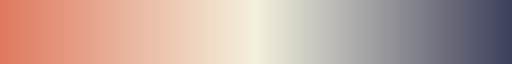

In [1]:
from scipy import odr
import matplotlib as mpl
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import gridspec
import matplotlib.colors as mcolors
import plotly.express as px, plotly.graph_objects as go
import os
import seaborn as sns
from matplotlib.colors import to_rgba

pd.options.mode.chained_assignment = None
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.size'] = 13  
colors = ["#e07a5f", "#f4f1de", "#3d405b"]
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", colors)
custom_cmap

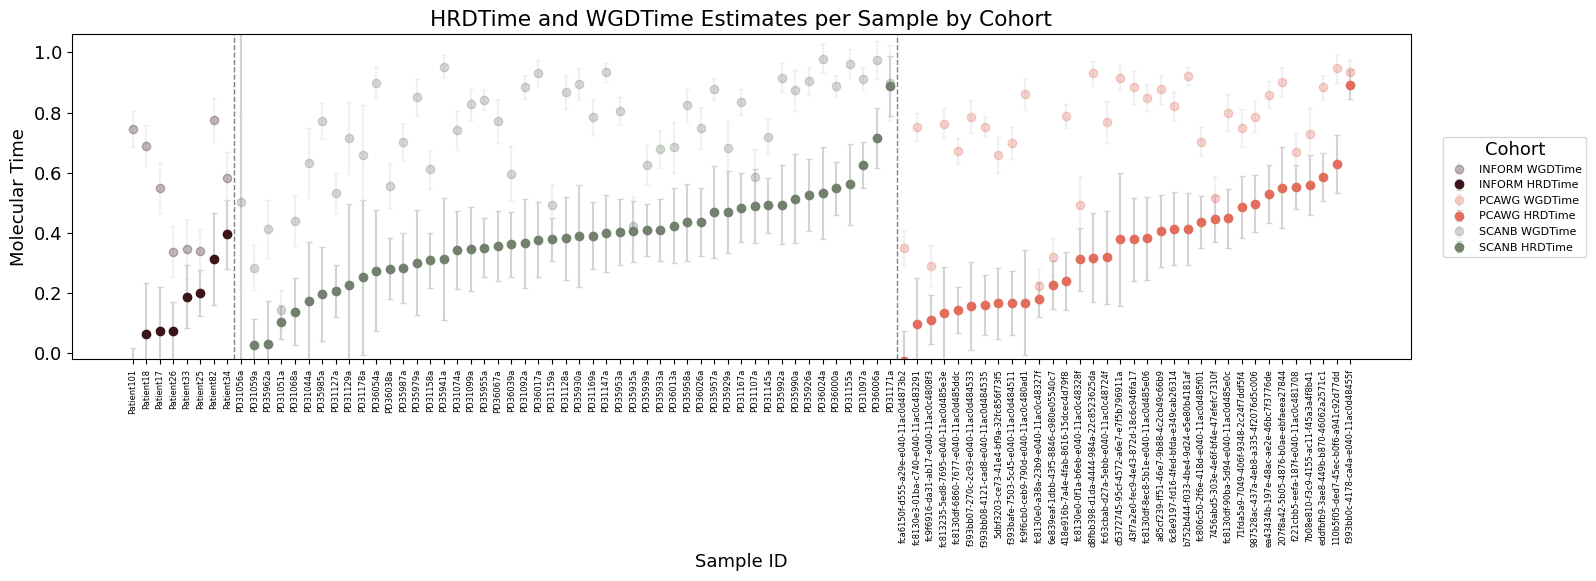

In [ ]:
files = {
    'INFORM': "INFORM_germline_filtered_Breast_WGD_HRD_TimingResults_v9_timing_nboot200.csv",
    'SCANB': "SCANB_unfiltered_Breast_WGD_HRD_TimingResults_v9_timing_nboot200.csv",
    'PCAWG': "PCAWG_Breast_WGD_HRD_TimingResults_v9_timing_nboot200.csv"
}

files ={
    'SCANB': "/Users/michail/HMS Dropbox/Michail Andreopoulos/HRDTimer/data/output/May27_TimingRun/SCANB_Breast_WGD_HRD_TimingResults_timing_nboot200_0001_only_prob_change_boot.csv",
    'PCAWG': "/Users/michail/HMS Dropbox/Michail Andreopoulos/HRDTimer/data/output/May27_TimingRun/PCAWG_Breast_WGD_HRD_TimingResults_timing_nboot200_0001_only_prob_change_boot.csv",
    'INFORM': "/Users/michail/HMS Dropbox/Michail Andreopoulos/HRDTimer/data/output/May27_TimingRun/INFORM_Breast_WGD_HRD_TimingResults_timing_nboot200_0001_only_prob_change_boot.csv"
}

colors = {'INFORM': '#3c1518', 'SCANB': '#71816d', 'PCAWG': '#e26d5c'}
colors = {'INFORM': '#DFCC94', 'SCANB': '#93A55D', 'PCAWG': '#0F4722'}

x_pos, cohort_boundaries, dfs = 0, [], []

for k, f in files.items():
    df = pd.read_csv(f)[['ID', 'HRDTime', 'HRDTime_ci', 'WGDTime', 'WGDTime_ci']].dropna()
    df = df.sort_values('HRDTime').reset_index(drop=True)
    df['Dataset'], df['x'] = k, range(x_pos, x_pos + len(df))
    x_pos += len(df)
    cohort_boundaries.append(x_pos)
    dfs.append(df)

df_all = pd.concat(dfs, ignore_index=True)

plt.figure(figsize=(18, 6))
for k, g in df_all.groupby('Dataset'):
    plt.errorbar(g['x'], g['WGDTime'], yerr=g['WGDTime_ci'], fmt='o', color=colors[k], ecolor='lightgrey', alpha=0.3, capsize=2, label=f"{k} WGDTime")
    plt.errorbar(g['x'], g['HRDTime'], yerr=g['HRDTime_ci'], fmt='o', color=colors[k], ecolor='lightgrey', capsize=2, label=f"{k} HRDTime")

for b in cohort_boundaries[:-1]:
    plt.axvline(x=b - 0.5, color='grey', linestyle='--', linewidth=1)

plt.xticks(df_all['x'], df_all['ID'], rotation=90, fontsize=6)
plt.ylim(-0.02, 1.06)
plt.ylabel("Molecular Time")
plt.xlabel("Sample ID")
plt.title("HRDTime and WGDTime Estimates per Sample by Cohort")
plt.tight_layout(rect=[0, 0, 0.8, 1])
plt.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), fontsize=8, title="Cohort")
plt.show()


Removed samples from SCANB due to invalid CI values:
['PD31056a']
Removed samples from PCAWG due to invalid CI values:
['fca6150f-d555-a29e-e040-11ac0d4873b2', '43f7a2e0-fec9-4e43-872d-18c6c946fa17']
Removed samples from INFORM due to invalid CI values:
['Patient101']


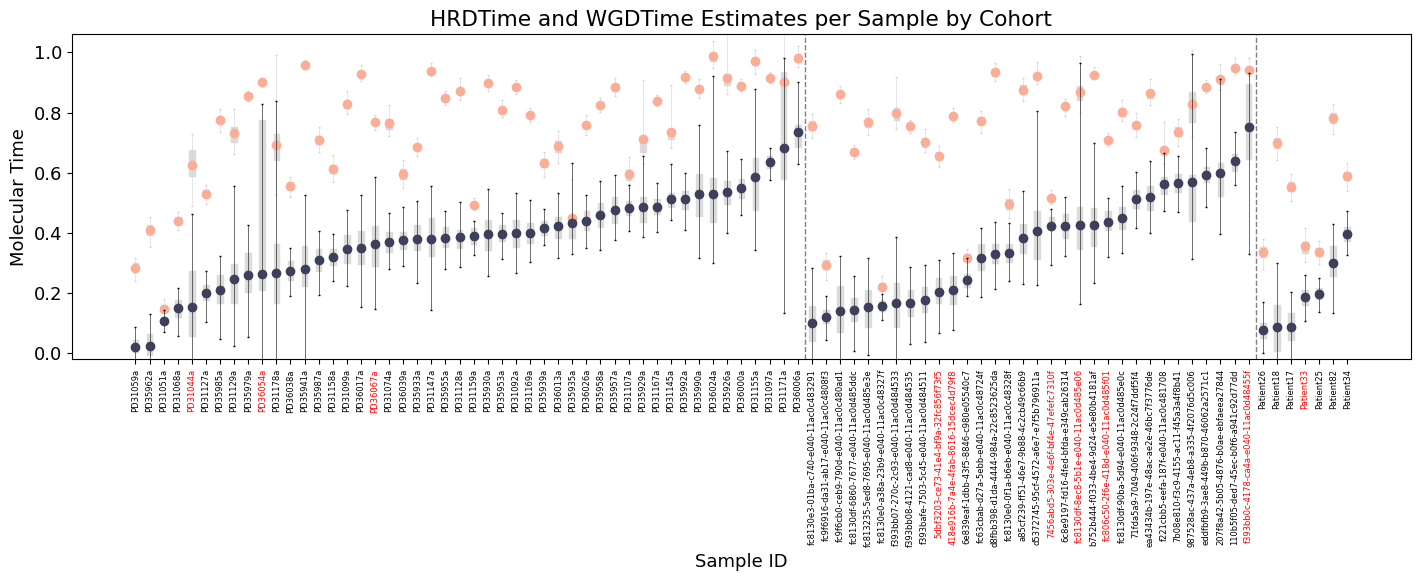

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

files = {
    'SCANB': "/Users/michail/HMS Dropbox/Michail Andreopoulos/HRDTimer/data/output/May27_TimingRun/SCANB_Breast_WGD_HRD_TimingResults_timing_nboot200_0001_only_prob_change_boot.csv",
    'PCAWG': "/Users/michail/HMS Dropbox/Michail Andreopoulos/HRDTimer/data/output/May27_TimingRun/PCAWG_Breast_WGD_HRD_TimingResults_timing_nboot200_0001_only_prob_change_boot.csv",
    'INFORM': "/Users/michail/HMS Dropbox/Michail Andreopoulos/HRDTimer/data/output/May27_TimingRun/INFORM_Breast_WGD_HRD_TimingResults_timing_nboot200_0001_only_prob_change_boot.csv"
}

colors = {'INFORM': '#DFCC94', 'SCANB': '#93A55D', 'PCAWG': '#0F4722'}
colors_WGD = {'INFORM': '#fff3cf', 'SCANB': '#dbebae', 'PCAWG': '#c5dece'}

x_pos, cohort_boundaries, dfs = 0, [], []

for k, f in files.items():
    df = pd.read_csv(f)[[
        'ID',
        'HRDTime', 'HRDTime_ci_lo', 'HRDTime_ci_hi', 'HRDTime_ci_IQR_lo', 'HRDTime_ci_IQR_hi',
        'WGDTime', 'WGDTime_ci_lo', 'WGDTime_ci_hi', 'WGDTime_ci_IQR_lo', 'WGDTime_ci_IQR_hi'
    ]].dropna()

    # Identify and remove problematic rows
    invalid_mask = (
        (df['HRDTime_ci_lo'] < 0) |
        (df['HRDTime_ci_hi'] < 0) |
        (df['WGDTime_ci_lo'] < 0) |
        (df['WGDTime_ci_hi'] < 0) |
        (df['HRDTime_ci_IQR_lo'] < 0) |
        (df['HRDTime_ci_IQR_hi'] < 0) |        
        (df['WGDTime_ci_IQR_lo'] < 0) |
        (df['WGDTime_ci_IQR_hi'] < 0) |
        (df['HRDTime'] < 0)
    )

    if invalid_mask.any():
        print(f"Removed samples from {k} due to invalid CI values:")
        print(df.loc[invalid_mask, 'ID'].tolist())

    df = df[~invalid_mask].sort_values('HRDTime').reset_index(drop=True)
    df['Dataset'], df['x'] = k, range(x_pos, x_pos + len(df))
    x_pos += len(df)
    cohort_boundaries.append(x_pos)
    dfs.append(df)

df_all = pd.concat(dfs, ignore_index=True)

# Load metadata
metadata_path = "/Users/michail/HMS Dropbox/Michail Andreopoulos/HRDTimer/data/metadata/pan_metadata_v4.csv"
meta = pd.read_csv(metadata_path)

# Set index to sample for faster lookup
meta.set_index('sample', inplace=True)

# Function to determine if sample should be red
def is_sample_invalid(sample_id):
    try:
        row = meta.loc[sample_id]
        return (
            row.get('timerQC_fail', False) == True or
            row.get('del.mh.prop', 1.0) < 0.4 or
            row.get('HRDetect.bootstrap.score.percentile.5', 1.0) < 0.7
        )
    except KeyError:
        return False

# Create list of colors for xtick labels based on QC status
tick_colors = [
    'red' if is_sample_invalid(sample_id) else 'black'
    for sample_id in df_all['ID']
]

plt.figure(figsize=(18, 6))

for k, g in df_all.groupby('Dataset'):
    # HRDTime 95% CI error bars
    yerr_hrd = [g['HRDTime_ci_lo'], g['HRDTime_ci_hi']]
    plt.errorbar(
        g['x'], g['HRDTime'], yerr=yerr_hrd,
        fmt='o', color='#3d405b', ecolor='k',
        elinewidth=0.4,
        capsize=1, label=f"{k} HRDTime",
        zorder=3
    )

    # WGDTime 95% CI error bars
    yerr_wgd = [g['WGDTime_ci_lo'], g['WGDTime_ci_hi']]
    plt.errorbar(
        g['x'], g['WGDTime'], yerr=yerr_wgd,
        fmt='o', color='#fcad97', ecolor='lightgrey',
        elinewidth=0.4,
        alpha=1, capsize=1, label=f"{k} WGDTime"
    )

    # HRDTime IQR as vertical boxes centered at HRDTime
    for i, row in g.iterrows():
        hrd_iqr_low = row['HRDTime'] - (row['HRDTime_ci_IQR_lo'])
        hrd_iqr_high = row['HRDTime'] + (row['HRDTime_ci_IQR_hi'])
        plt.fill_between(
            [row['x'] - 0.2, row['x'] + 0.2],
            [hrd_iqr_low, hrd_iqr_low],
            [hrd_iqr_high, hrd_iqr_high],
            color='#dbdbdb', alpha=1, zorder=0
        )

    # WGDTime IQR as vertical boxes centered at WGDTime
    for i, row in g.iterrows():
        wgd_iqr_low = row['WGDTime'] - (row['WGDTime_ci_IQR_lo'])
        wgd_iqr_high = row['WGDTime'] + (row['WGDTime_ci_IQR_hi'])
        plt.fill_between(
            [row['x'] - 0.2, row['x'] + 0.2],
            [wgd_iqr_low, wgd_iqr_low],
            [wgd_iqr_high, wgd_iqr_high],
            color='#dbdbdb', alpha=1, zorder=0
        )


# Draw cohort split lines
for b in cohort_boundaries[:-1]:
    plt.axvline(x=b - 0.5, color='grey', linestyle='--', linewidth=1)

# X-axis formatting
#plt.xticks(df_all['x'], df_all['ID'], rotation=90, fontsize=6)
xticks = plt.xticks(df_all['x'], df_all['ID'], rotation=90, fontsize=6)
for ticklabel, color in zip(xticks[1], tick_colors):
    ticklabel.set_color(color)
plt.ylim(-0.02, 1.06)
plt.ylabel("Molecular Time")
plt.xlabel("Sample ID")
plt.title("HRDTime and WGDTime Estimates per Sample by Cohort")
plt.tight_layout(rect=[0, 0, 0.8, 1])
#plt.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), fontsize=8, title="Cohort")
plt.savefig("/Users/michail/HMS Dropbox/Michail Andreopoulos/HRDTimer/test.pdf", format='pdf', bbox_inches='tight')
plt.show()


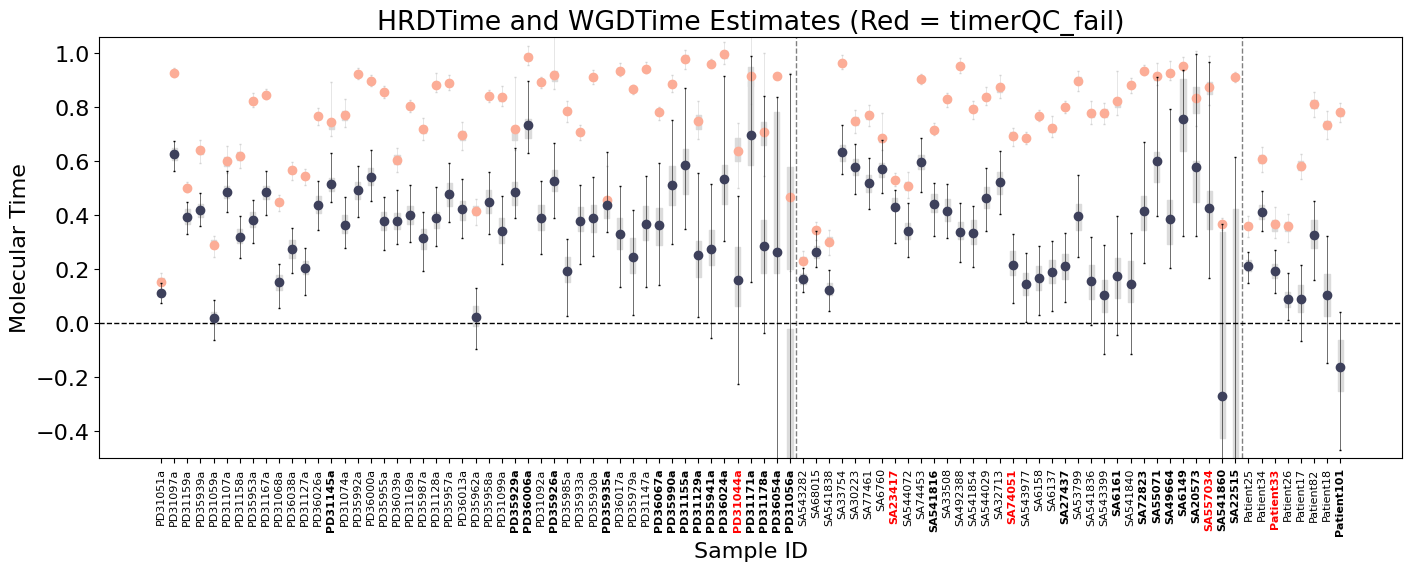

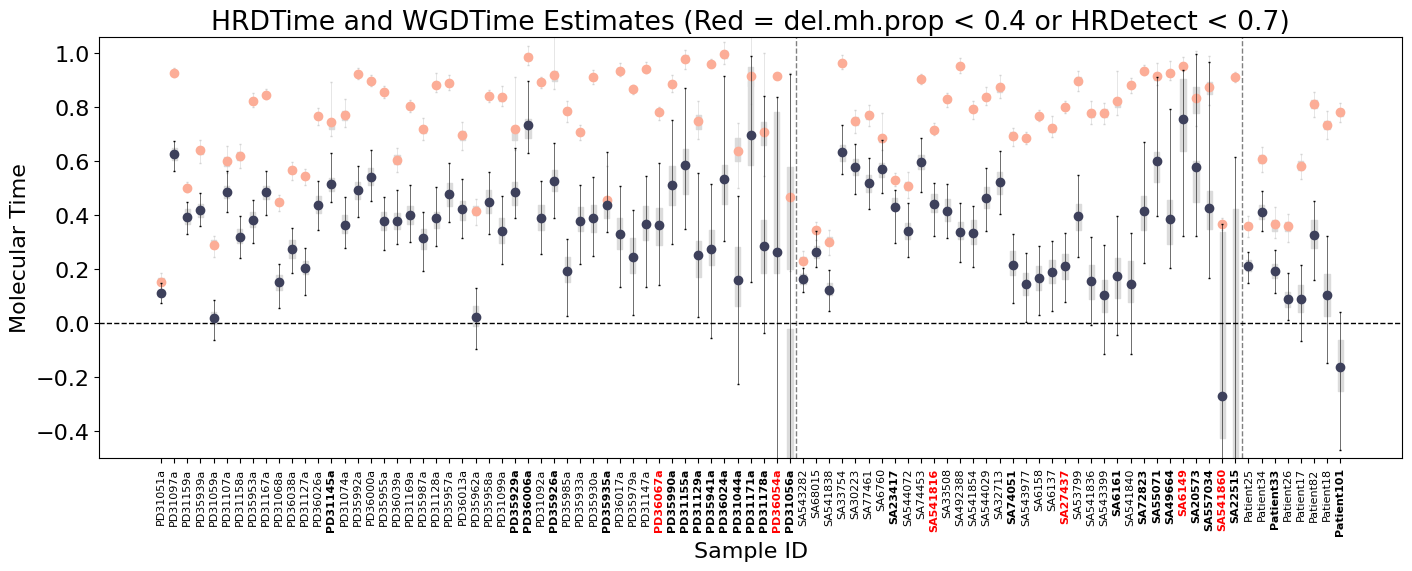

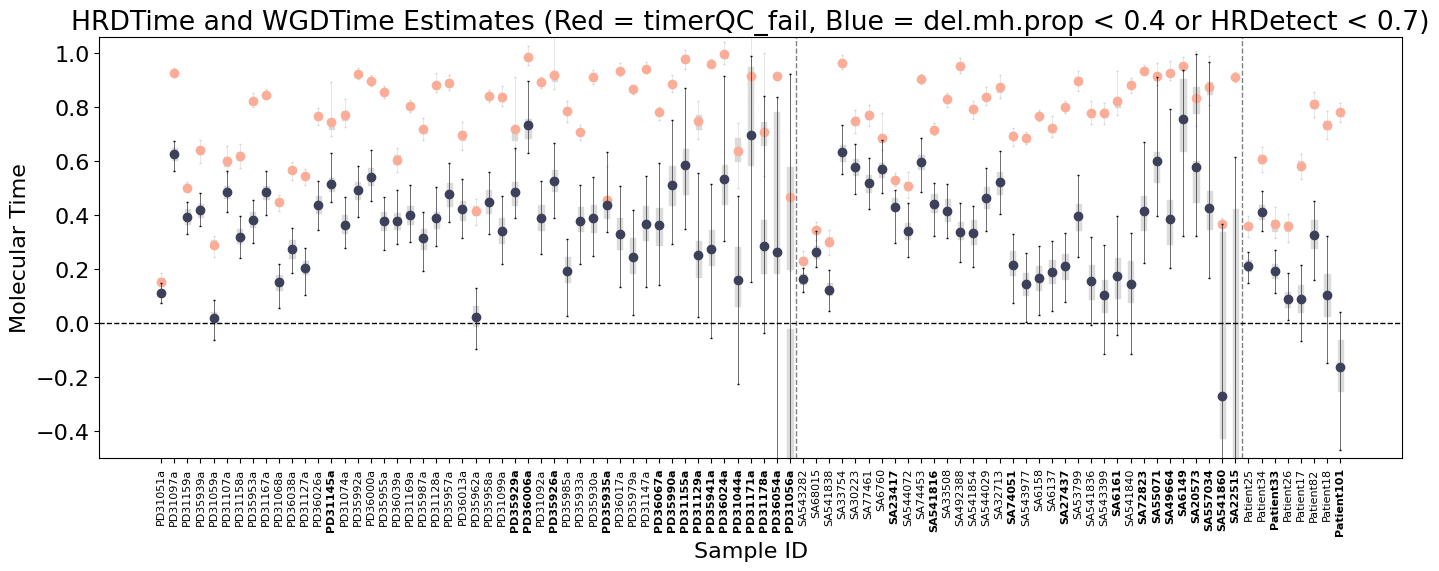

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

files = {
    'SCANB': "/Users/michail/HMS Dropbox/Michail Andreopoulos/HRDTimer/data/output/May27_TimingRun/SCANB_Breast_WGD_HRD_TimingResults_timing_nboot200_0001_only_prob_change_boot.csv",
    'PCAWG': "/Users/michail/HMS Dropbox/Michail Andreopoulos/HRDTimer/data/output/May27_TimingRun/PCAWG_Breast_WGD_HRD_TimingResults_timing_nboot200_0001_only_prob_change_boot_pSub.csv",
    'INFORM': "/Users/michail/HMS Dropbox/Michail Andreopoulos/HRDTimer/data/output/May27_TimingRun/INFORM_Breast_WGD_HRD_TimingResults_timing_nboot200_0001_only_prob_change_boot_pSub.csv"
}

colors = {'INFORM': '#DFCC94', 'SCANB': '#93A55D', 'PCAWG': '#0F4722'}
colors_WGD = {'INFORM': '#fff3cf', 'SCANB': '#dbebae', 'PCAWG': '#c5dece'}

samples_to_exclude = [
    'PD31145a', 'PD35929a', 'PD36006a', 'PD35926a', 'PD35935a', 'PD36067a', 'PD35990a',
    'PD31129a', 'PD31155a', 'PD35941a', 'PD36024a', 'PD31044a', 'PD31171a', 'PD31178a',
    'PD36054a', 'PD31056a', 
    '7456abd5-303e-4e6f-bf4e-47efefc7310f', 'fc806c50-2f6e-418d-e040-11ac0d485f01',
    '5dbf3203-ce73-41e4-bf9a-32fc856f73f5', '418e916b-7a4e-4fab-8616-15dcec4d79f8',
    'f393bb07-270c-2c93-e040-11ac0d484533', 'b752b444-f033-4be4-9d24-e5e80b4181af',
    '207f8a42-5b05-4876-b0ae-ebfaeea27844', 'd5372745-95cf-4572-a6e7-e7f5b796911a',
    'f393bb0c-4178-ca4a-e040-11ac0d48455f', '987528ac-437a-4eb8-a335-4f2076d5c006',
    'fc8130df-8ec8-5b1e-e040-11ac0d485e06', 'fca6150f-d555-a29e-e040-11ac0d4873b2',
    '43f7a2e0-fec9-4e43-872d-18c6c946fa17', 'Patient33', 'Patient101'
]

# Load metadata once
metadata_path = "/Users/michail/HMS Dropbox/Michail Andreopoulos/HRDTimer/data/metadata/pan_metadata_v4.csv"
meta = pd.read_csv(metadata_path)
meta.set_index('sample', inplace=True)

# === FUNCTION TO LOAD AND PREPROCESS DATAFRAME ===
def prepare_data():
    x_pos, cohort_boundaries, dfs = 0, [], []
    for k, f in files.items():
        df = pd.read_csv(f)[[
            'ID',
            'HRDTime', 'HRDTime_ci_lo', 'HRDTime_ci_hi', 'HRDTime_ci_IQR_lo', 'HRDTime_ci_IQR_hi',
            'WGDTime', 'WGDTime_ci_lo', 'WGDTime_ci_hi', 'WGDTime_ci_IQR_lo', 'WGDTime_ci_IQR_hi'
        ]].dropna()

        # Remove invalid rows
        invalid_mask = (
            (df['HRDTime_ci_lo'] < 0) |
            (df['HRDTime_ci_hi'] < 0) |
            (df['WGDTime_ci_lo'] < 0) |
            (df['WGDTime_ci_hi'] < 0) |
            (df['HRDTime_ci_IQR_lo'] < 0) |
            (df['HRDTime_ci_IQR_hi'] < 0) |
            (df['WGDTime_ci_IQR_lo'] < 0) |
            (df['WGDTime_ci_IQR_hi'] < 0) 
            #(df['HRDTime'] < 0)
        )

        if invalid_mask.any():
            print(f"Removed samples from {k} due to invalid CI values:")
            print(df.loc[invalid_mask, 'ID'].tolist())

        df = df[~invalid_mask].sort_values('HRDTime').reset_index(drop=True)
        df['Dataset'], df['x'] = k, range(x_pos, x_pos + len(df))
        x_pos += len(df)
        cohort_boundaries.append(x_pos)
        dfs.append(df)

    return pd.concat(dfs, ignore_index=True), cohort_boundaries

# === SECOND FUNCTION TO SORT BY CI
def prepare_data():
    x_pos, cohort_boundaries, dfs = 0, [], []
    sample_order_dict = {'SCANB': [], 'PCAWG': [], 'INFORM': []}

    for k, f in files.items():
        df = pd.read_csv(f)[[
            'ID',
            'HRDTime', 'HRDTime_ci_lo', 'HRDTime_ci_hi', 'HRDTime_ci_IQR_lo', 'HRDTime_ci_IQR_hi',
            'WGDTime', 'WGDTime_ci_lo', 'WGDTime_ci_hi', 'WGDTime_ci_IQR_lo', 'WGDTime_ci_IQR_hi'
        ]].dropna()

        # Remove invalid rows
        invalid_mask = (
            (df['HRDTime_ci_lo'] < 0) |
            (df['HRDTime_ci_hi'] < 0) |
            (df['WGDTime_ci_lo'] < 0) |
            (df['WGDTime_ci_hi'] < 0) |
            (df['HRDTime_ci_IQR_lo'] < 0) |
            (df['HRDTime_ci_IQR_hi'] < 0) |
            (df['WGDTime_ci_IQR_lo'] < 0) |
            (df['WGDTime_ci_IQR_hi'] < 0)
        )

        if invalid_mask.any():
            print(f"Removed samples from {k} due to invalid CI values:")
            print(df.loc[invalid_mask, 'ID'].tolist())

        df = df[~invalid_mask].copy()

        # Sort by total CI range size
        df['HRD_ci_range'] = df['HRDTime_ci_hi'] + df['HRDTime_ci_lo']
        df = df.sort_values('HRD_ci_range').reset_index(drop=True)

        # Track sample ID order per cohort
        sample_order_dict[k] = df['ID'].tolist()

        df['Dataset'], df['x'] = k, range(x_pos, x_pos + len(df))
        x_pos += len(df)
        cohort_boundaries.append(x_pos)
        dfs.append(df)

    return pd.concat(dfs, ignore_index=True), cohort_boundaries, sample_order_dict

# === PLOTTING FUNCTION ===
def plot_hrd_wgd(df_all, cohort_boundaries, tick_colors, out_path, title):

    # Load metadata and prepare the sample.display map
    metadata = pd.read_csv("/Users/michail/HMS Dropbox/Michail Andreopoulos/HRDTimer/data/metadata/pan_metadata_v5.csv")
    sample_display_map = metadata.set_index("sample")["sample.display"].to_dict()

    plt.figure(figsize=(18, 6))

    for k, g in df_all.groupby('Dataset'):
        # Plot HRDTime
        yerr_hrd = [g['HRDTime_ci_lo'], g['HRDTime_ci_hi']]
        plt.errorbar(
            g['x'], g['HRDTime'], yerr=yerr_hrd,
            fmt='o', color='#3d405b', ecolor='k',
            elinewidth=0.4, capsize=1, label=f"{k} HRDTime", zorder=3
        )

        # Plot WGDTime
        yerr_wgd = [g['WGDTime_ci_lo'], g['WGDTime_ci_hi']]
        plt.errorbar(
            g['x'], g['WGDTime'], yerr=yerr_wgd,
            fmt='o', color='#fcad97', ecolor='lightgrey',
            elinewidth=0.4, alpha=1, capsize=1, label=f"{k} WGDTime"
        )

        # HRDTime IQR boxes
        for i, row in g.iterrows():
            hrd_iqr_low = row['HRDTime'] - row['HRDTime_ci_IQR_lo']
            hrd_iqr_high = row['HRDTime'] + row['HRDTime_ci_IQR_hi']
            plt.fill_between([row['x'] - 0.2, row['x'] + 0.2],
                             [hrd_iqr_low, hrd_iqr_low],
                             [hrd_iqr_high, hrd_iqr_high],
                             color='#dbdbdb', alpha=1, zorder=0)

        # WGDTime IQR boxes
        for i, row in g.iterrows():
            wgd_iqr_low = row['WGDTime'] - row['WGDTime_ci_IQR_lo']
            wgd_iqr_high = row['WGDTime'] + row['WGDTime_ci_IQR_hi']
            plt.fill_between([row['x'] - 0.2, row['x'] + 0.2],
                             [wgd_iqr_low, wgd_iqr_low],
                             [wgd_iqr_high, wgd_iqr_high],
                             color='#dbdbdb', alpha=1, zorder=0)

    # Add vertical lines between cohorts
    for b in cohort_boundaries[:-1]:
        plt.axvline(x=b - 0.5, color='grey', linestyle='--', linewidth=1)

    #xticks = plt.xticks(df_all['x'], df_all['ID'], rotation=90, fontsize=6)
    # Map sample IDs to display labels
    display_labels = df_all['ID'].map(sample_display_map).fillna(df_all['ID'])

    xticks = plt.xticks(df_all['x'], display_labels, rotation=90, fontsize=8)

    #for ticklabel, color in zip(xticks[1], tick_colors):
    #   ticklabel.set_color(color)

    for ticklabel, sample_id, color in zip(xticks[1], df_all['ID'], tick_colors):
        ticklabel.set_color(color)
        if sample_id in samples_to_exclude:
            ticklabel.set_fontweight('bold')
    plt.axhline(y=0, color='k', linestyle='--', linewidth=1)
    plt.ylim(-0.5, 1.06)
    plt.ylabel("Molecular Time")
    plt.xlabel("Sample ID")
    plt.title(title)
    plt.tight_layout(rect=[0, 0, 0.8, 1])
    plt.savefig(out_path, format='pdf', bbox_inches='tight')
    plt.show()

# === FILTER 1: Only timerQC ===
def is_timerqc_fail_only(sample_id):
    try:
        return meta.loc[sample_id].get('timerQC_fail', False) == True
    except KeyError:
        return False

# === FILTER 2: Only del.mh.prop < 0.4 or HRDetect < 0.7 ===
def is_other_fail_only(sample_id):
    try:
        row = meta.loc[sample_id]
        return (
            row.get('timerQC_fail', False) == False and
            (row.get('del.mh.prop', 1.0) < 0.4 or
             row.get('HRDetect.bootstrap.score.percentile.5', 1.0) < 0.7)
        )
    except KeyError:
        return False

# === RUN & PLOT BOTH ===
#df_all, cohort_boundaries = prepare_data()
df_all, cohort_boundaries, sample_order_dict = prepare_data()

# Version 1: timerQC only
tick_colors_qc = ['red' if is_timerqc_fail_only(sid) else 'black' for sid in df_all['ID']]
plot_hrd_wgd(df_all, cohort_boundaries, tick_colors_qc,
             "/Users/michail/HMS Dropbox/Michail Andreopoulos/HRDTimer/hrd_wgd_timerQC.pdf",
             "HRDTime and WGDTime Estimates (Red = timerQC_fail)")

# Version 2: other filters
tick_colors_other = ['red' if is_other_fail_only(sid) else 'black' for sid in df_all['ID']]
plot_hrd_wgd(df_all, cohort_boundaries, tick_colors_other,
             "/Users/michail/HMS Dropbox/Michail Andreopoulos/HRDTimer/hrd_wgd_other_filters.pdf",
             "HRDTime and WGDTime Estimates (Red = del.mh.prop < 0.4 or HRDetect < 0.7)")


# Combined coloring: prioritize timerQC_fail as red, then other filter as blue, else black
tick_colors_combined = []
for sid in df_all['ID']:
    if is_timerqc_fail_only(sid):
        tick_colors_combined.append('black')
    elif is_other_fail_only(sid):
        tick_colors_combined.append('black')
    else:
        tick_colors_combined.append('black')

# Plot with combined colors
plot_hrd_wgd(df_all, cohort_boundaries, tick_colors_combined,
             "/Users/michail/HMS Dropbox/Michail Andreopoulos/HRDTimer/hrd_wgd_combined_filters.pdf",
             "HRDTime and WGDTime Estimates (Red = timerQC_fail, Blue = del.mh.prop < 0.4 or HRDetect < 0.7)")




Removed 16 samples from SCANB:
['PD31044a', 'PD31056a', 'PD31129a', 'PD31145a', 'PD31155a', 'PD31171a', 'PD31178a', 'PD35926a', 'PD35929a', 'PD35935a', 'PD35941a', 'PD35990a', 'PD36006a', 'PD36024a', 'PD36054a', 'PD36067a']

Removed 13 samples from PCAWG:
['f393bb0c-4178-ca4a-e040-11ac0d48455f', 'f393bb07-270c-2c93-e040-11ac0d484533', 'fc806c50-2f6e-418d-e040-11ac0d485f01', 'fc8130df-8ec8-5b1e-e040-11ac0d485e06', 'fca6150f-d555-a29e-e040-11ac0d4873b2', 'b752b444-f033-4be4-9d24-e5e80b4181af', '418e916b-7a4e-4fab-8616-15dcec4d79f8', '207f8a42-5b05-4876-b0ae-ebfaeea27844', '987528ac-437a-4eb8-a335-4f2076d5c006', '43f7a2e0-fec9-4e43-872d-18c6c946fa17', 'd5372745-95cf-4572-a6e7-e7f5b796911a', '5dbf3203-ce73-41e4-bf9a-32fc856f73f5', '7456abd5-303e-4e6f-bf4e-47efefc7310f']

Removed 2 samples from INFORM:
['Patient101', 'Patient33']


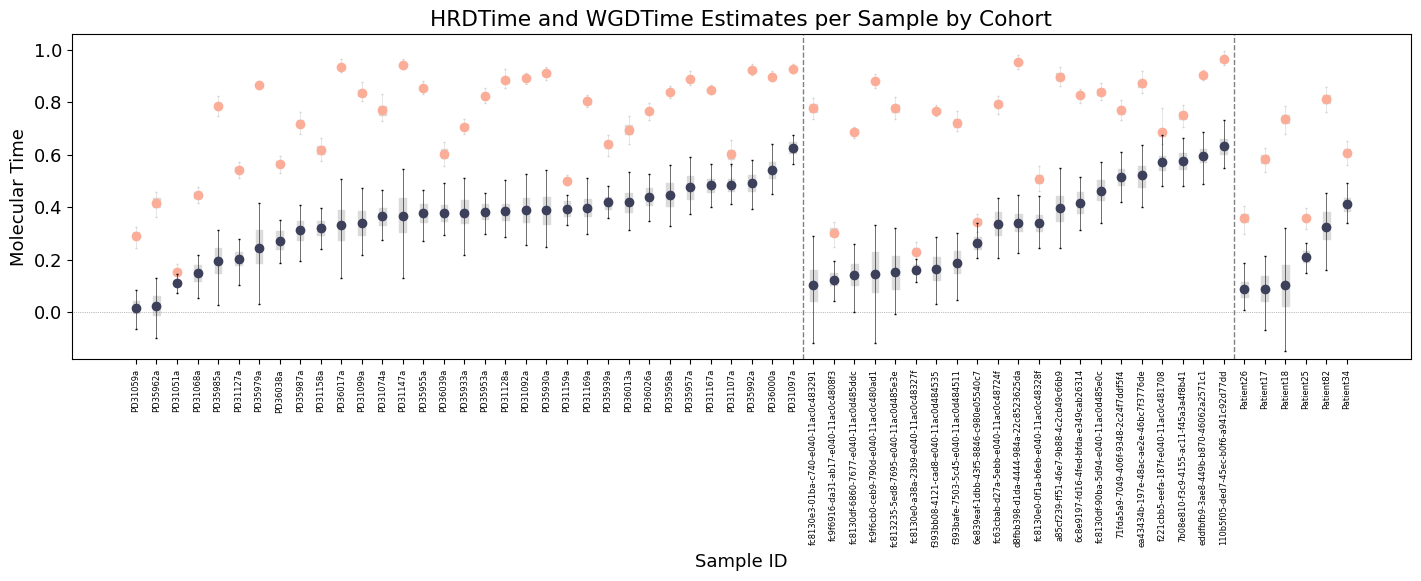


Detailed exclusion reasons:
PD31044a: timerQC_fail
PD31056a: 
PD31129a: 
PD31145a: 
PD31155a: 
PD31171a: 
PD31178a: 
PD35926a: 
PD35929a: 
PD35935a: 
PD35941a: 
PD35990a: 
PD36006a: 
PD36024a: 
PD36054a: del.mh.prop < 0.4
PD36067a: del.mh.prop < 0.4
f393bb0c-4178-ca4a-e040-11ac0d48455f: del.mh.prop < 0.4; HRDetect < 0.7
f393bb07-270c-2c93-e040-11ac0d484533: 
fc806c50-2f6e-418d-e040-11ac0d485f01: del.mh.prop < 0.4
fc8130df-8ec8-5b1e-e040-11ac0d485e06: timerQC_fail
fca6150f-d555-a29e-e040-11ac0d4873b2: del.mh.prop < 0.4; HRDetect < 0.7
b752b444-f033-4be4-9d24-e5e80b4181af: 
418e916b-7a4e-4fab-8616-15dcec4d79f8: del.mh.prop < 0.4
207f8a42-5b05-4876-b0ae-ebfaeea27844: 
987528ac-437a-4eb8-a335-4f2076d5c006: 
43f7a2e0-fec9-4e43-872d-18c6c946fa17: 
d5372745-95cf-4572-a6e7-e7f5b796911a: 
5dbf3203-ce73-41e4-bf9a-32fc856f73f5: timerQC_fail
7456abd5-303e-4e6f-bf4e-47efefc7310f: timerQC_fail; del.mh.prop < 0.4
Patient101: 
Patient33: timerQC_fail
                              sample_id  removed r

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

files = {
    'SCANB': "/Users/michail/HMS Dropbox/Michail Andreopoulos/HRDTimer/data/output/May27_TimingRun/SCANB_Breast_WGD_HRD_TimingResults_timing_nboot200_0001_only_prob_change_boot.csv",
    'PCAWG': "/Users/michail/HMS Dropbox/Michail Andreopoulos/HRDTimer/data/output/May27_TimingRun/PCAWG_Breast_WGD_HRD_TimingResults_timing_nboot200_0001_only_prob_change_boot_pSub.csv",
    'INFORM': "/Users/michail/HMS Dropbox/Michail Andreopoulos/HRDTimer/data/output/May27_TimingRun/INFORM_Breast_WGD_HRD_TimingResults_timing_nboot200_0001_only_prob_change_boot_pSub.csv"
}

colors = {'INFORM': '#DFCC94', 'SCANB': '#93A55D', 'PCAWG': '#0F4722'}
colors_WGD = {'INFORM': '#fff3cf', 'SCANB': '#dbebae', 'PCAWG': '#c5dece'}

x_pos, cohort_boundaries, dfs = 0, [], []
exclusion_reasons = {}

# Load metadata
metadata_path = "/Users/michail/HMS Dropbox/Michail Andreopoulos/HRDTimer/data/metadata/pan_metadata_v4.csv"
meta = pd.read_csv(metadata_path)
meta.set_index('sample', inplace=True)

samples_to_exclude = [
    'PD31145a', 'PD35929a', 'PD36006a', 'PD35926a', 'PD35935a', 'PD36067a', 'PD35990a',
    'PD31129a', 'PD31155a', 'PD35941a', 'PD36024a', 'PD31044a', 'PD31171a', 'PD31178a',
    'PD36054a', 'PD31056a', 
    '7456abd5-303e-4e6f-bf4e-47efefc7310f', 'fc806c50-2f6e-418d-e040-11ac0d485f01',
    '5dbf3203-ce73-41e4-bf9a-32fc856f73f5', '418e916b-7a4e-4fab-8616-15dcec4d79f8',
    'f393bb07-270c-2c93-e040-11ac0d484533', 'b752b444-f033-4be4-9d24-e5e80b4181af',
    '207f8a42-5b05-4876-b0ae-ebfaeea27844', 'd5372745-95cf-4572-a6e7-e7f5b796911a',
    'f393bb0c-4178-ca4a-e040-11ac0d48455f', '987528ac-437a-4eb8-a335-4f2076d5c006',
    'fc8130df-8ec8-5b1e-e040-11ac0d485e06', 'fca6150f-d555-a29e-e040-11ac0d4873b2',
    '43f7a2e0-fec9-4e43-872d-18c6c946fa17', 'Patient33', 'Patient101'
]

for k, f in files.items():
    df = pd.read_csv(f)[[
        'ID',
        'HRDTime', 'HRDTime_ci_lo', 'HRDTime_ci_hi', 'HRDTime_ci_IQR_lo', 'HRDTime_ci_IQR_hi',
        'WGDTime', 'WGDTime_ci_lo', 'WGDTime_ci_hi', 'WGDTime_ci_IQR_lo', 'WGDTime_ci_IQR_hi'
    ]].dropna()

    # Identify problematic rows
    invalid_mask = (
        (df['ID'].isin(samples_to_exclude))
    )

    excluded_ids = df.loc[invalid_mask, 'ID'].tolist()
    if excluded_ids:
        print(f"\nRemoved {len(excluded_ids)} samples from {k}:")
        print(excluded_ids)

        for sid in excluded_ids:
            reasons = []
            if sid in meta.index:
                if meta.loc[sid].get('timerQC_fail', False) == True:
                    reasons.append("timerQC_fail")
                if meta.loc[sid].get('del.mh.prop', 1.0) < 0.4:
                    reasons.append("del.mh.prop < 0.4")
                if meta.loc[sid].get('HRDetect.bootstrap.score.percentile.5', 1.0) < 0.7:
                    reasons.append("HRDetect < 0.7")
            else:
                reasons.append("not in metadata")
            exclusion_reasons[sid] = reasons

    df = df[~invalid_mask].sort_values('HRDTime').reset_index(drop=True)
    df['Dataset'], df['x'] = k, range(x_pos, x_pos + len(df))
    x_pos += len(df)
    cohort_boundaries.append(x_pos)
    dfs.append(df)

df_all = pd.concat(dfs, ignore_index=True)

# Remove excluded samples
df_all = df_all[~df_all['ID'].isin(samples_to_exclude)].reset_index(drop=True)

# Recalculate x positions
df_all['x'] = range(len(df_all))

# Define tick color based on filtering
def is_sample_invalid(sample_id):
    try:
        row = meta.loc[sample_id]
        return (
            row.get('timerQC_fail', False) == True or
            row.get('del.mh.prop', 1.0) < 0.4 or
            row.get('HRDetect.bootstrap.score.percentile.5', 1.0) < 0.7
        )
    except KeyError:
        return False

tick_colors = [
    'red' if is_sample_invalid(sample_id) else 'black'
    for sample_id in df_all['ID']
]

# === Plot ===
plt.figure(figsize=(18, 6))

for k, g in df_all.groupby('Dataset'):
    # HRDTime 95% CI
    yerr_hrd = [g['HRDTime_ci_lo'], g['HRDTime_ci_hi']]
    plt.errorbar(g['x'], g['HRDTime'], yerr=yerr_hrd,
        fmt='o', color='#3d405b', ecolor='k', elinewidth=0.4, capsize=1,
        markersize=6,  # Reduced dot size
        label=f"{k} HRDTime", zorder=3
    )

    # WGDTime 95% CI
    yerr_wgd = [g['WGDTime_ci_lo'], g['WGDTime_ci_hi']]
    plt.errorbar(g['x'], g['WGDTime'], yerr=yerr_wgd,
        fmt='o', color='#fcad97', ecolor='lightgrey', elinewidth=0.4,
        alpha=1, capsize=1, markersize=6,  # Reduced dot size
        label=f"{k} WGDTime"
    )

    # HRD IQR boxes
    for _, row in g.iterrows():
        plt.fill_between([row['x'] - 0.16, row['x'] + 0.16],
                         [row['HRDTime'] - row['HRDTime_ci_IQR_lo']]*2,
                         [row['HRDTime'] + row['HRDTime_ci_IQR_hi']]*2,
                         color='#dbdbdb', alpha=1, zorder=0)

    # WGD IQR boxes
    for _, row in g.iterrows():
        plt.fill_between([row['x'] - 0.16, row['x'] + 0.16],
                         [row['WGDTime'] - row['WGDTime_ci_IQR_lo']]*2,
                         [row['WGDTime'] + row['WGDTime_ci_IQR_hi']]*2,
                         color='#dbdbdb', alpha=1, zorder=0)

# Split lines
for b in cohort_boundaries[:-1]:
    plt.axvline(x=b - 0.5, color='grey', linestyle='--', linewidth=1)

# X ticks
xticks = plt.xticks(df_all['x'], df_all['ID'], rotation=90, fontsize=6)
for ticklabel, color in zip(xticks[1], tick_colors):
    ticklabel.set_color(color)

plt.ylim(-0.18, 1.06)
plt.ylabel("Molecular Time")
plt.xlabel("Sample ID")
plt.title("HRDTime and WGDTime Estimates per Sample by Cohort")
plt.axhline(y=0, color='grey', linestyle=':', linewidth=0.5)
plt.tight_layout(rect=[0, 0, 0.8, 1])
plt.savefig("/Users/michail/HMS Dropbox/Michail Andreopoulos/HRDTimer/test.pdf", format='pdf', bbox_inches='tight')
plt.show()

# === Print reasons for exclusion ===
if exclusion_reasons:
    print("\nDetailed exclusion reasons:")
    for sid, reasons in exclusion_reasons.items():
        print(f"{sid}: {'; '.join(reasons)}")
else:
    print("\nNo excluded samples found with filtering criteria.")


# Combine all sample IDs from all datasets
all_ids = set()
for f in files.values():
    df_ids = pd.read_csv(f)['ID'].dropna().tolist()
    all_ids.update(df_ids)

# Create list of dictionaries with removal status and reason
records = []
for sample_id in all_ids:
    removed = sample_id in samples_to_exclude
    reasons = exclusion_reasons.get(sample_id, [])
    records.append({
        'sample_id': sample_id,
        'removed': removed,
        'reasons': '; '.join(reasons) if removed else ''
    })

# Create DataFrame
removal_df = pd.DataFrame(records)

# Save or display
removal_df.to_csv("sample_removal_reasons.csv", index=False)
print(removal_df.head())

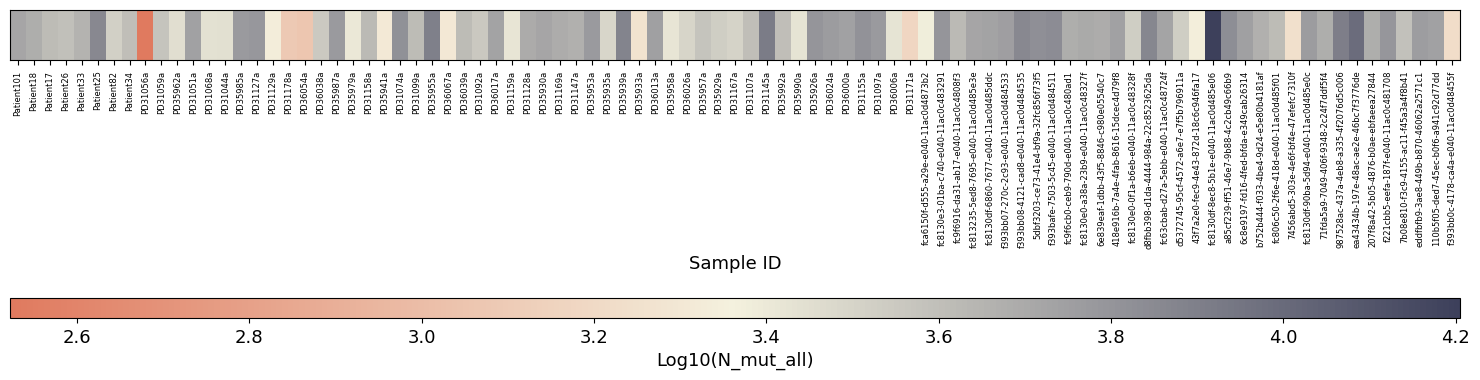

In [4]:
colors = {'INFORM': '#3c1518', 'SCANB': '#71816d', 'PCAWG': '#e26d5c'}

def parse_list(s):
    try: return np.array(eval(s, {"nan": np.nan}), dtype=float)
    except: return np.array([np.nan])

sorted_dfs, cohort_boundaries, x_pos = [], [], 0

for k, f in files.items():
    df = pd.read_csv(f)[['ID', 'HRDTime', 'HRDTime_ci', 'WGDTime', 'WGDTime_ci', 'N_mut_all']].dropna()
    df['N_mut_all_sum'] = df['N_mut_all'].apply(parse_list).apply(np.nansum)
    df = df.sort_values('HRDTime').reset_index(drop=True)
    df['Dataset'], df['x'] = k, range(x_pos, x_pos + len(df))
    x_pos += len(df)
    cohort_boundaries.append(x_pos)
    sorted_dfs.append(df)

df_all = pd.concat(sorted_dfs, ignore_index=True)

norm = mcolors.Normalize(vmin=np.log10(df_all['N_mut_all_sum'].min() + 1), vmax=np.log10(df_all['N_mut_all_sum'].max()))
fig = plt.figure(figsize=(15, 4))
ax = fig.add_subplot(111)

for _, row in df_all.iterrows():
    ax.add_patch(plt.Rectangle((row['x'] - 0.5, 0), 1, 1, color=custom_cmap(norm(np.log10(row['N_mut_all_sum'] + 1))), linewidth=0))

ax.set_xlim(-0.5, len(df_all) - 0.5)
ax.set_ylim(0, 1)
ax.set_yticks([])
ax.set_xticks(df_all['x'])
ax.set_xticklabels(df_all['ID'], rotation=90, fontsize=6)
ax.set_xlabel("Sample ID")

sm = plt.cm.ScalarMappable(cmap=custom_cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.7, aspect=70).set_label("Log10(N_mut_all)")

plt.tight_layout()
plt.show()

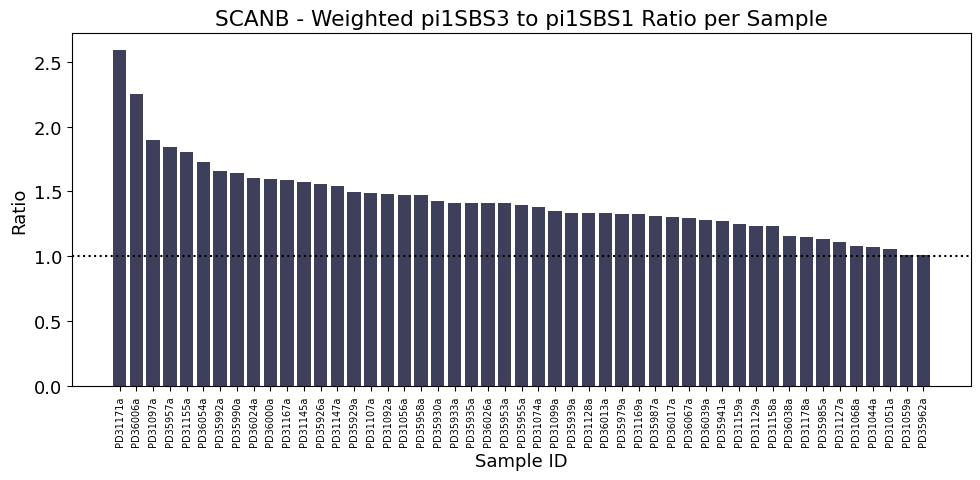

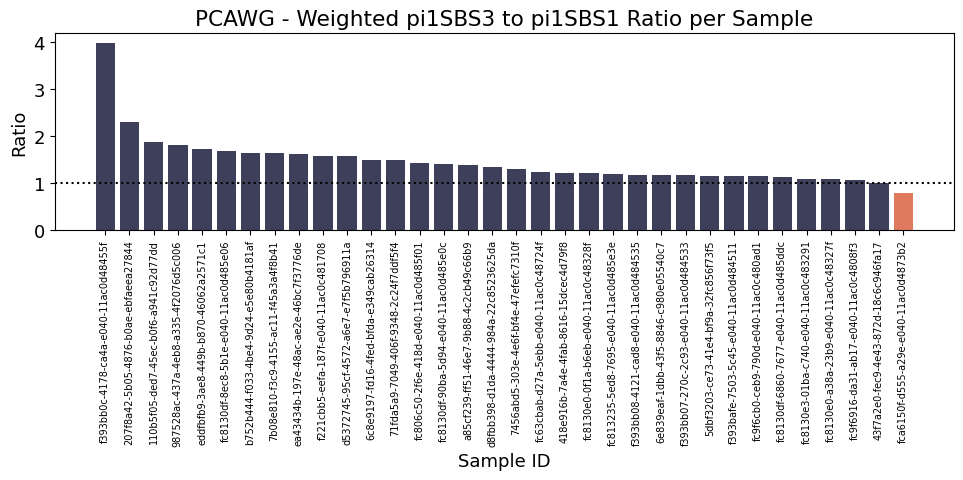

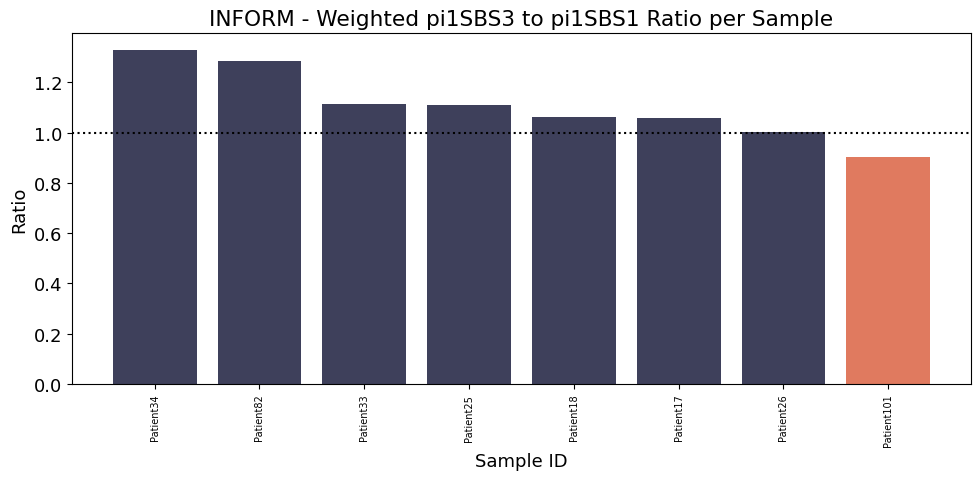

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def safe_eval_list(val):
    try:
        parsed = eval(val, {"nan": np.nan, "__builtins__": {}})
        if isinstance(parsed, list) and len(parsed) == 3:
            return [0 if pd.isna(x) else x for x in parsed]
        else:
            return [0, 0, 0]
    except:
        return [0, 0, 0]

def plot_weighted_SBS3_to_SBS1(filepath, title):
    df = pd.read_csv(filepath)

    # Parse list columns
    for col in ['pi1SBS1', 'pi1SBS3', 'N_mut_all']:
        df[col] = df[col].apply(safe_eval_list)

    # Compute weighted SBS3/SBS1
    def weighted_ratio(row):
        sbs1 = row['pi1SBS1']
        sbs3 = row['pi1SBS3']
        weights = row['N_mut_all']
        ratios = [s3 / s1 if s1 != 0 else 0 for s3, s1 in zip(sbs3, sbs1)]
        weighted_sum = sum(r * w for r, w in zip(ratios, weights))
        total_weight = sum(weights)
        return weighted_sum / total_weight if total_weight > 0 else 0

    df['weighted_SBS3_to_SBS1'] = df.apply(weighted_ratio, axis=1)
    plot_df = df.sort_values('weighted_SBS3_to_SBS1', ascending=False)

    # Color bars
    colors = ['#E07A5F' if val < 1 else '#3E405B' for val in plot_df['weighted_SBS3_to_SBS1']]

    # Plot
    plt.figure(figsize=(10, 5))
    plt.bar(plot_df['ID'], plot_df['weighted_SBS3_to_SBS1'], color=colors)
    plt.axhline(1, color='black', linestyle='dotted', linewidth=1.5)
    plt.xticks(rotation=90, fontsize=7)
    plt.xlabel('Sample ID')
    plt.ylabel('Ratio')
    plt.title(f'{title} - Weighted pi1SBS3 to pi1SBS1 Ratio per Sample')
    plt.tight_layout()
    plt.show()

# Files dictionary
files = {
    'SCANB': "/Users/michail/HMS Dropbox/Michail Andreopoulos/HRDTimer/data/output/May27_TimingRun/SCANB_Breast_WGD_HRD_TimingResults_timing_nboot200_0001_only_prob_change_boot.csv",
    'PCAWG': "/Users/michail/HMS Dropbox/Michail Andreopoulos/HRDTimer/data/output/May27_TimingRun/PCAWG_Breast_WGD_HRD_TimingResults_timing_nboot200_0001_only_prob_change_boot.csv",
    'INFORM': "/Users/michail/HMS Dropbox/Michail Andreopoulos/HRDTimer/data/output/May27_TimingRun/INFORM_Breast_WGD_HRD_TimingResults_timing_nboot200_0001_only_prob_change_boot.csv"
}

# Apply function
for label, path in files.items():
    plot_weighted_SBS3_to_SBS1(path, title=label)


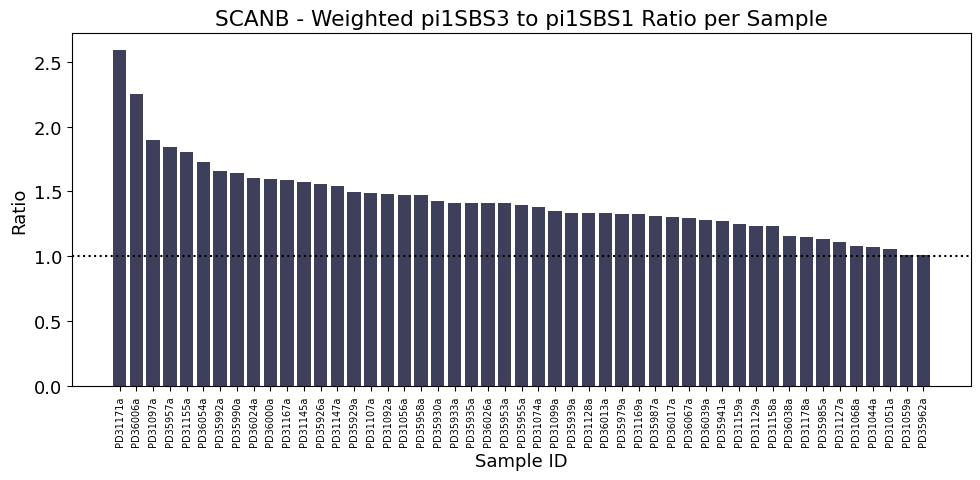

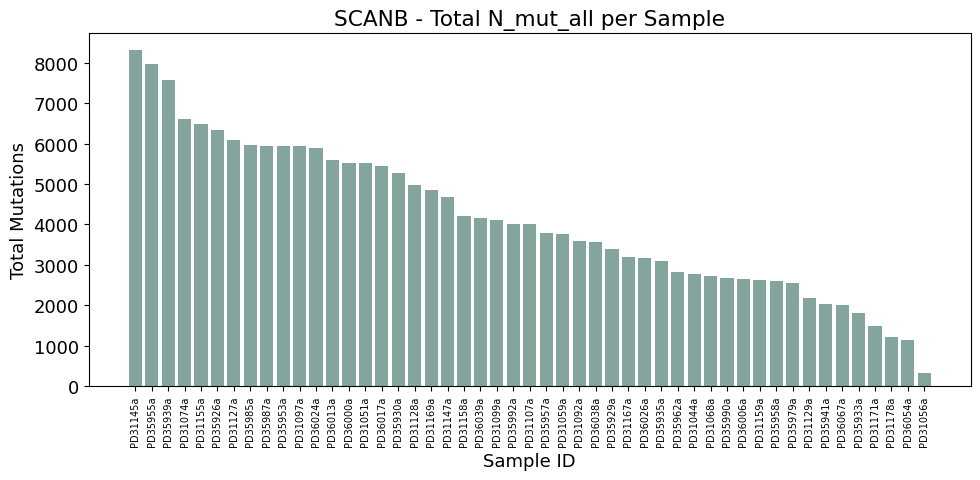

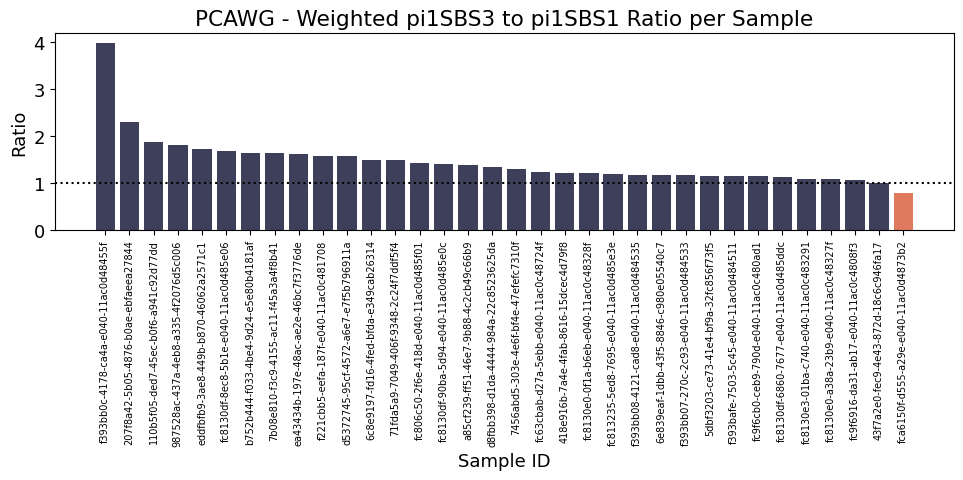

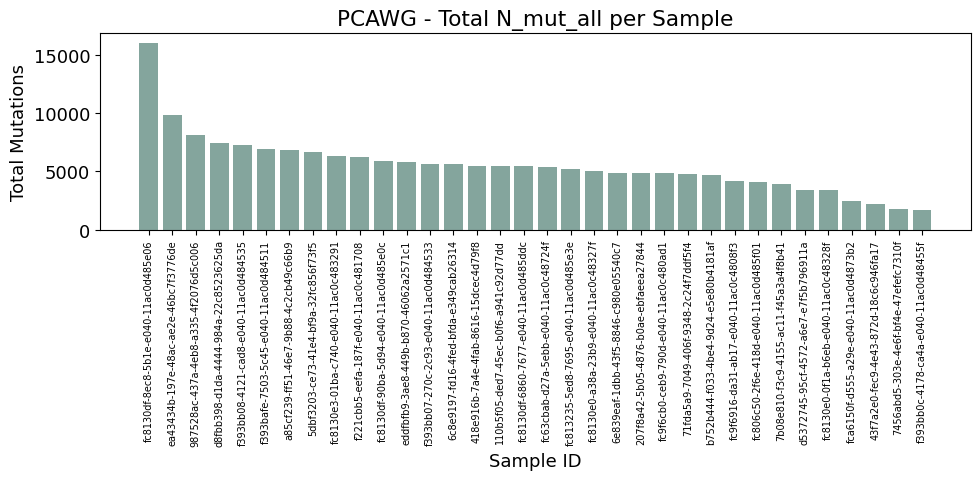

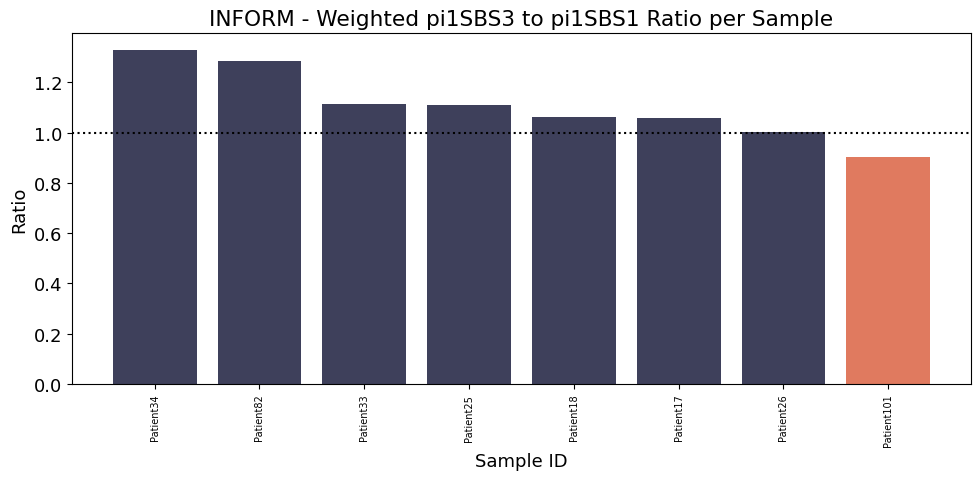

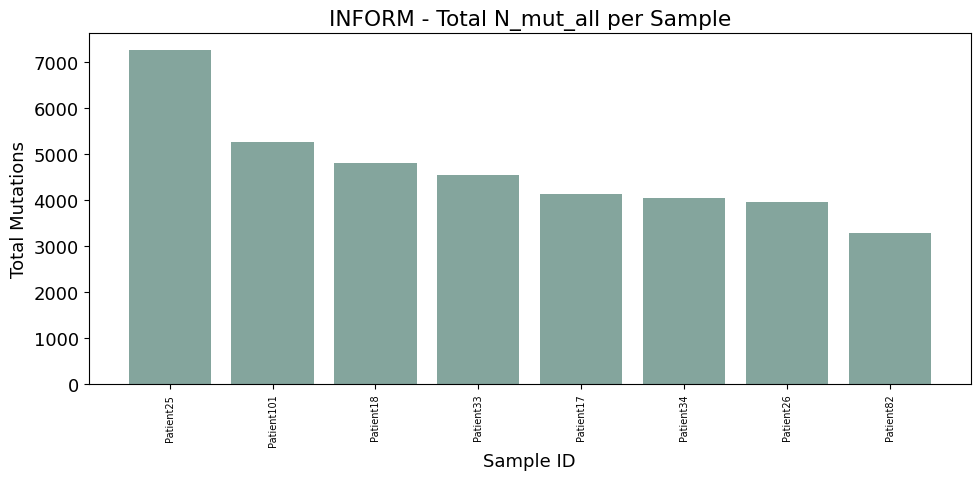

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def safe_eval_list(val):
    try:
        parsed = eval(val, {"nan": np.nan, "__builtins__": {}})
        if isinstance(parsed, list) and len(parsed) == 3:
            return [0 if pd.isna(x) else x for x in parsed]
        else:
            return [0, 0, 0]
    except:
        return [0, 0, 0]

def plot_weighted_SBS3_to_SBS1(filepath, title):
    df = pd.read_csv(filepath)

    for col in ['pi1SBS1', 'pi1SBS3', 'N_mut_all']:
        df[col] = df[col].apply(safe_eval_list)

    def weighted_ratio(row):
        sbs1 = row['pi1SBS1']
        sbs3 = row['pi1SBS3']
        weights = row['N_mut_all']
        ratios = [s3 / s1 if s1 != 0 else 0 for s3, s1 in zip(sbs3, sbs1)]
        weighted_sum = sum(r * w for r, w in zip(ratios, weights))
        total_weight = sum(weights)
        return weighted_sum / total_weight if total_weight > 0 else 0

    df['weighted_SBS3_to_SBS1'] = df.apply(weighted_ratio, axis=1)
    plot_df = df.sort_values('weighted_SBS3_to_SBS1', ascending=False)

    colors = ['#E07A5F' if val < 1 else '#3E405B' for val in plot_df['weighted_SBS3_to_SBS1']]

    plt.figure(figsize=(10, 5))
    plt.bar(plot_df['ID'], plot_df['weighted_SBS3_to_SBS1'], color=colors)
    plt.axhline(1, color='black', linestyle='dotted', linewidth=1.5)
    plt.xticks(rotation=90, fontsize=7)
    plt.xlabel('Sample ID')
    plt.ylabel('Ratio')
    plt.title(f'{title} - Weighted pi1SBS3 to pi1SBS1 Ratio per Sample')
    plt.tight_layout()
    plt.show()

def plot_total_N_mut_all(filepath, title):
    df = pd.read_csv(filepath)

    df['N_mut_all'] = df['N_mut_all'].apply(safe_eval_list)
    df['total_N_mut'] = df['N_mut_all'].apply(sum)
    plot_df = df.sort_values('total_N_mut', ascending=False)

    plt.figure(figsize=(10, 5))
    plt.bar(plot_df['ID'], plot_df['total_N_mut'], color='#84A59D')
    plt.xticks(rotation=90, fontsize=7)
    plt.xlabel('Sample ID')
    plt.ylabel('Total Mutations')
    plt.title(f'{title} - Total N_mut_all per Sample')
    plt.tight_layout()
    plt.show()

# Files dictionary
files = {
    'SCANB': "/Users/michail/HMS Dropbox/Michail Andreopoulos/HRDTimer/data/output/May27_TimingRun/SCANB_Breast_WGD_HRD_TimingResults_timing_nboot200_0001_only_prob_change_boot.csv",
    'PCAWG': "/Users/michail/HMS Dropbox/Michail Andreopoulos/HRDTimer/data/output/May27_TimingRun/PCAWG_Breast_WGD_HRD_TimingResults_timing_nboot200_0001_only_prob_change_boot.csv",
    'INFORM': "/Users/michail/HMS Dropbox/Michail Andreopoulos/HRDTimer/data/output/May27_TimingRun/INFORM_Breast_WGD_HRD_TimingResults_timing_nboot200_0001_only_prob_change_boot.csv"
}

# Apply both functions
for label, path in files.items():
    plot_weighted_SBS3_to_SBS1(path, title=label)
    plot_total_N_mut_all(path, title=label)


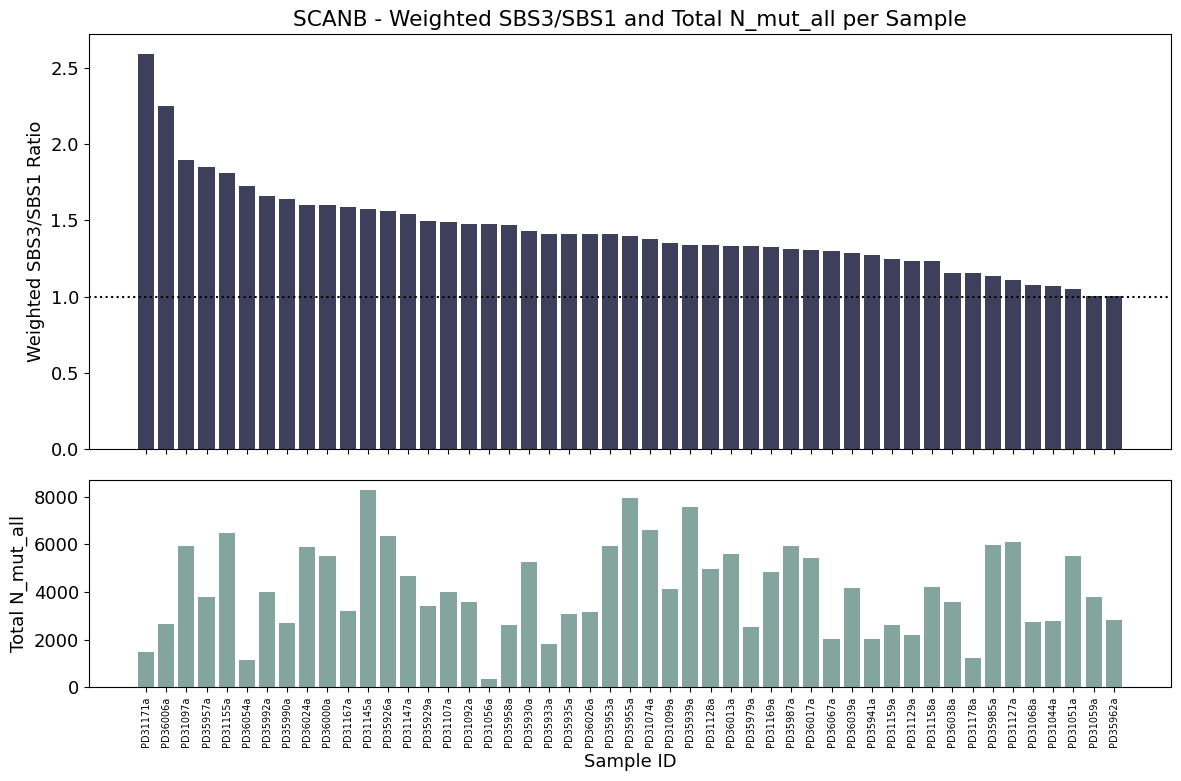

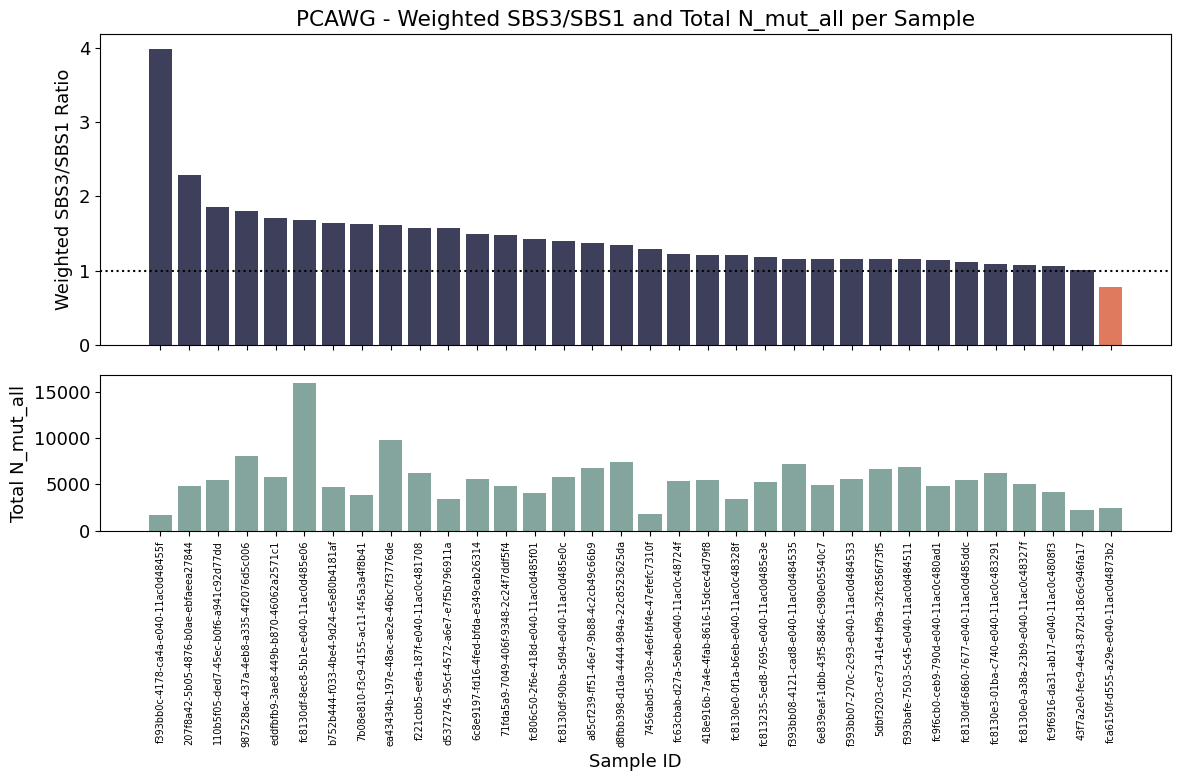

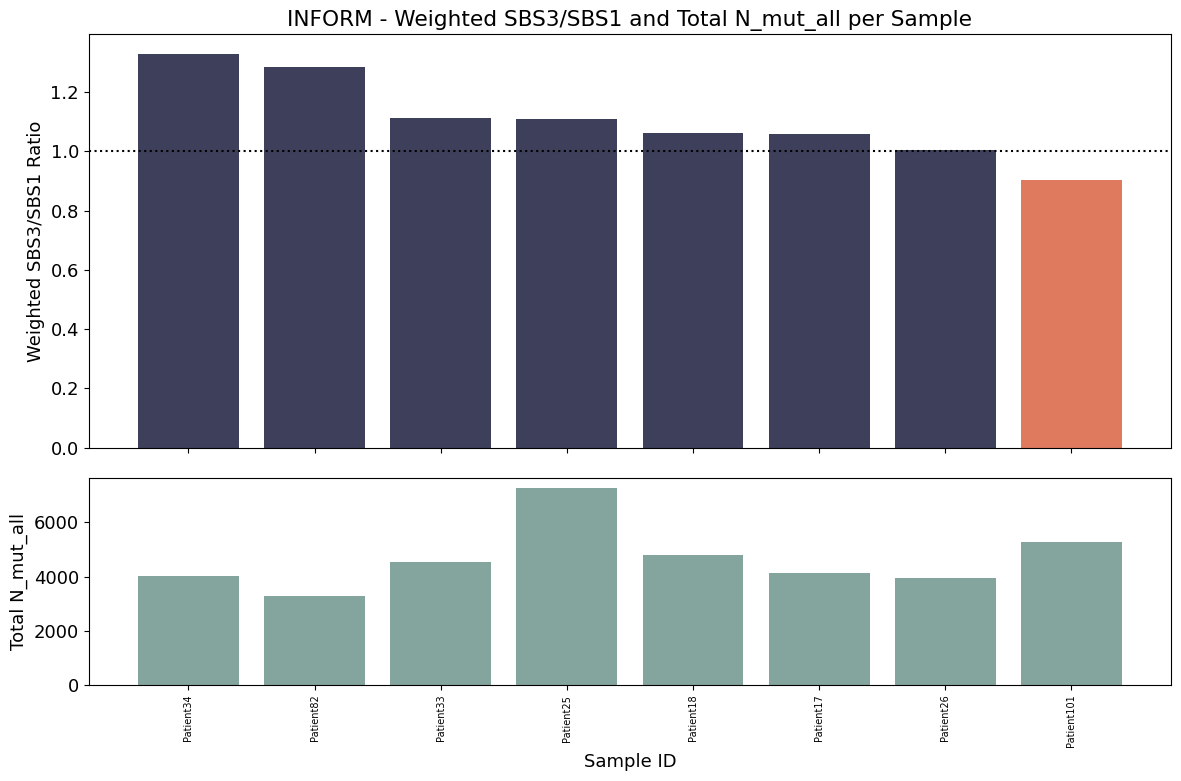

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def safe_eval_list(val):
    try:
        parsed = eval(val, {"nan": np.nan, "__builtins__": {}})
        if isinstance(parsed, list) and len(parsed) == 3:
            return [0 if pd.isna(x) else x for x in parsed]
        else:
            return [0, 0, 0]
    except:
        return [0, 0, 0]

def plot_combined_SBS3_SBS1_and_Nmut(filepath, title):
    df = pd.read_csv(filepath)

    for col in ['pi1SBS1', 'pi1SBS3', 'N_mut_all']:
        df[col] = df[col].apply(safe_eval_list)

    # Compute weighted SBS3/SBS1
    def weighted_ratio(row):
        sbs1 = row['pi1SBS1']
        sbs3 = row['pi1SBS3']
        weights = row['N_mut_all']
        ratios = [s3 / s1 if s1 != 0 else 0 for s3, s1 in zip(sbs3, sbs1)]
        weighted_sum = sum(r * w for r, w in zip(ratios, weights))
        total_weight = sum(weights)
        return weighted_sum / total_weight if total_weight > 0 else 0

    df['weighted_SBS3_to_SBS1'] = df.apply(weighted_ratio, axis=1)
    df['total_N_mut'] = df['N_mut_all'].apply(sum)

    # Sort by weighted ratio to maintain consistent x-axis
    plot_df = df.sort_values('weighted_SBS3_to_SBS1', ascending=False)

    colors = ['#E07A5F' if val < 1 else '#3E405B' for val in plot_df['weighted_SBS3_to_SBS1']]

    # Create subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True, gridspec_kw={'height_ratios': [2, 1]})

    # Top subplot: Weighted SBS3/SBS1
    ax1.bar(plot_df['ID'], plot_df['weighted_SBS3_to_SBS1'], color=colors)
    ax1.axhline(1, color='black', linestyle='dotted', linewidth=1.5)
    ax1.set_ylabel('Weighted SBS3/SBS1 Ratio')
    ax1.set_title(f'{title} - Weighted SBS3/SBS1 and Total N_mut_all per Sample')

    # Bottom subplot: Total N_mut_all
    ax2.bar(plot_df['ID'], plot_df['total_N_mut'], color='#84A59D')
    ax2.set_ylabel('Total N_mut_all')
    ax2.set_xlabel('Sample ID')
    ax2.tick_params(axis='x', rotation=90, labelsize=7)

    plt.tight_layout()
    plt.show()

# Files dictionary
files = {
    'SCANB': "/Users/michail/HMS Dropbox/Michail Andreopoulos/HRDTimer/data/output/May27_TimingRun/SCANB_Breast_WGD_HRD_TimingResults_timing_nboot200_0001_only_prob_change_boot.csv",
    'PCAWG': "/Users/michail/HMS Dropbox/Michail Andreopoulos/HRDTimer/data/output/May27_TimingRun/PCAWG_Breast_WGD_HRD_TimingResults_timing_nboot200_0001_only_prob_change_boot.csv",
    'INFORM': "/Users/michail/HMS Dropbox/Michail Andreopoulos/HRDTimer/data/output/May27_TimingRun/INFORM_Breast_WGD_HRD_TimingResults_timing_nboot200_0001_only_prob_change_boot.csv"
}

# Run plots
for label, path in files.items():
    plot_combined_SBS3_SBS1_and_Nmut(path, title=label)


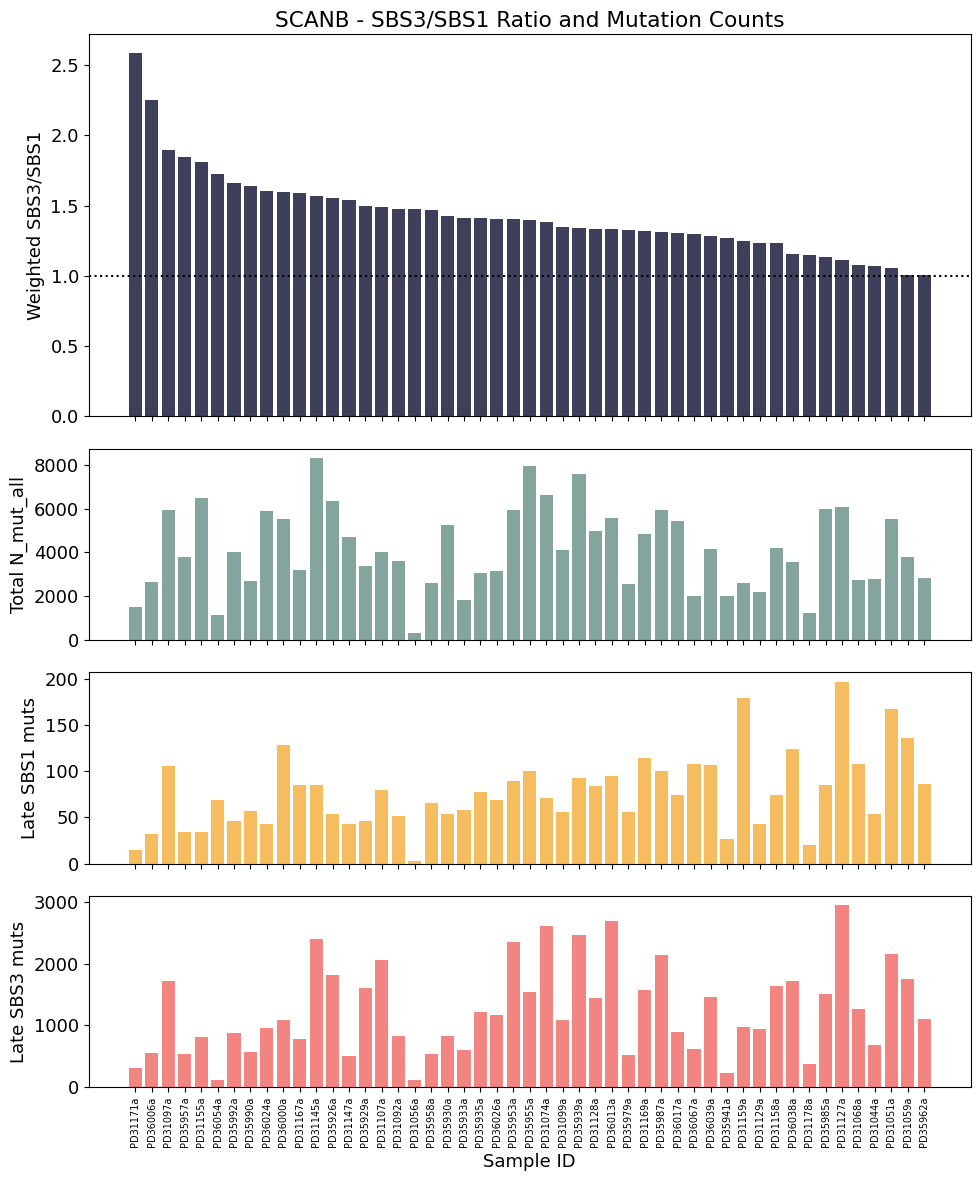

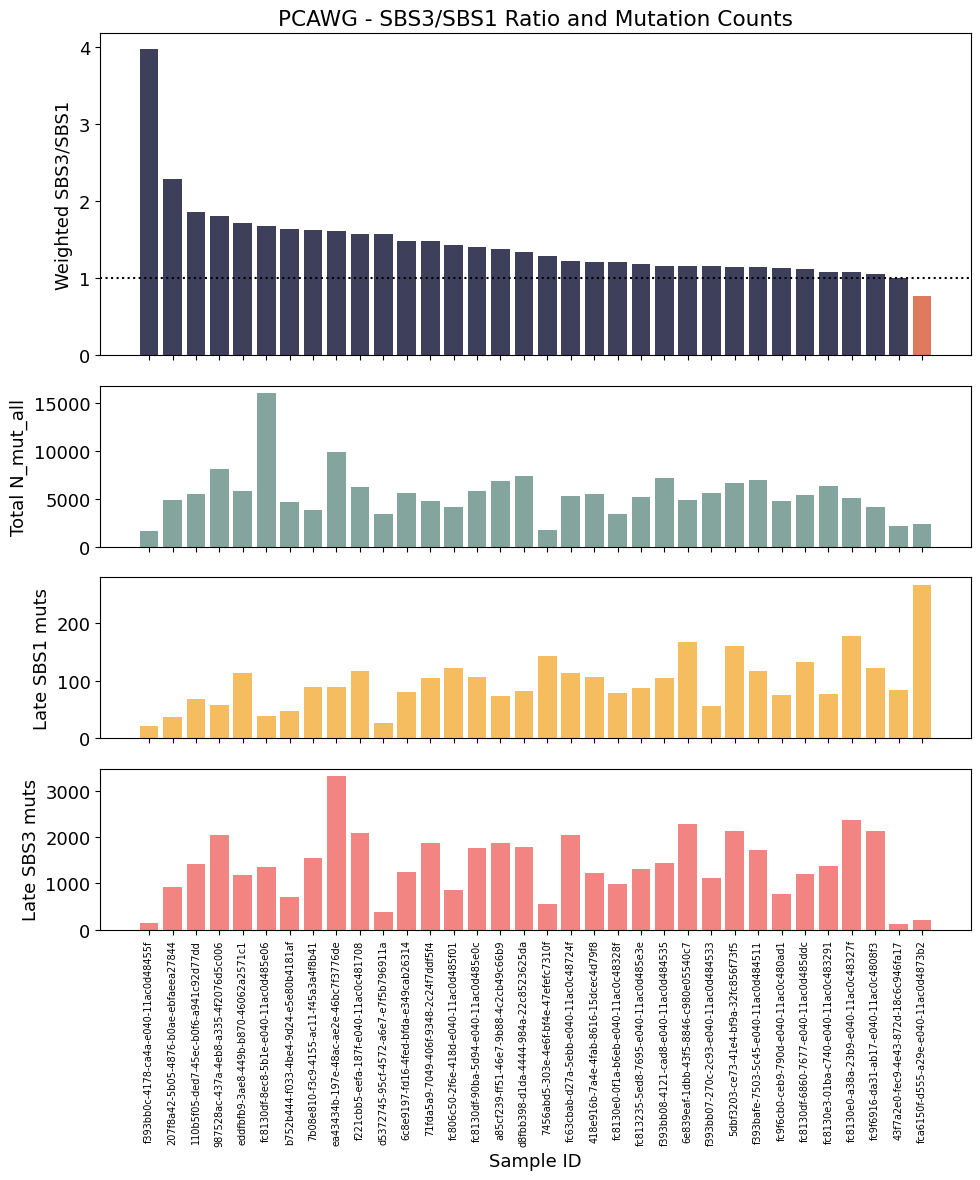

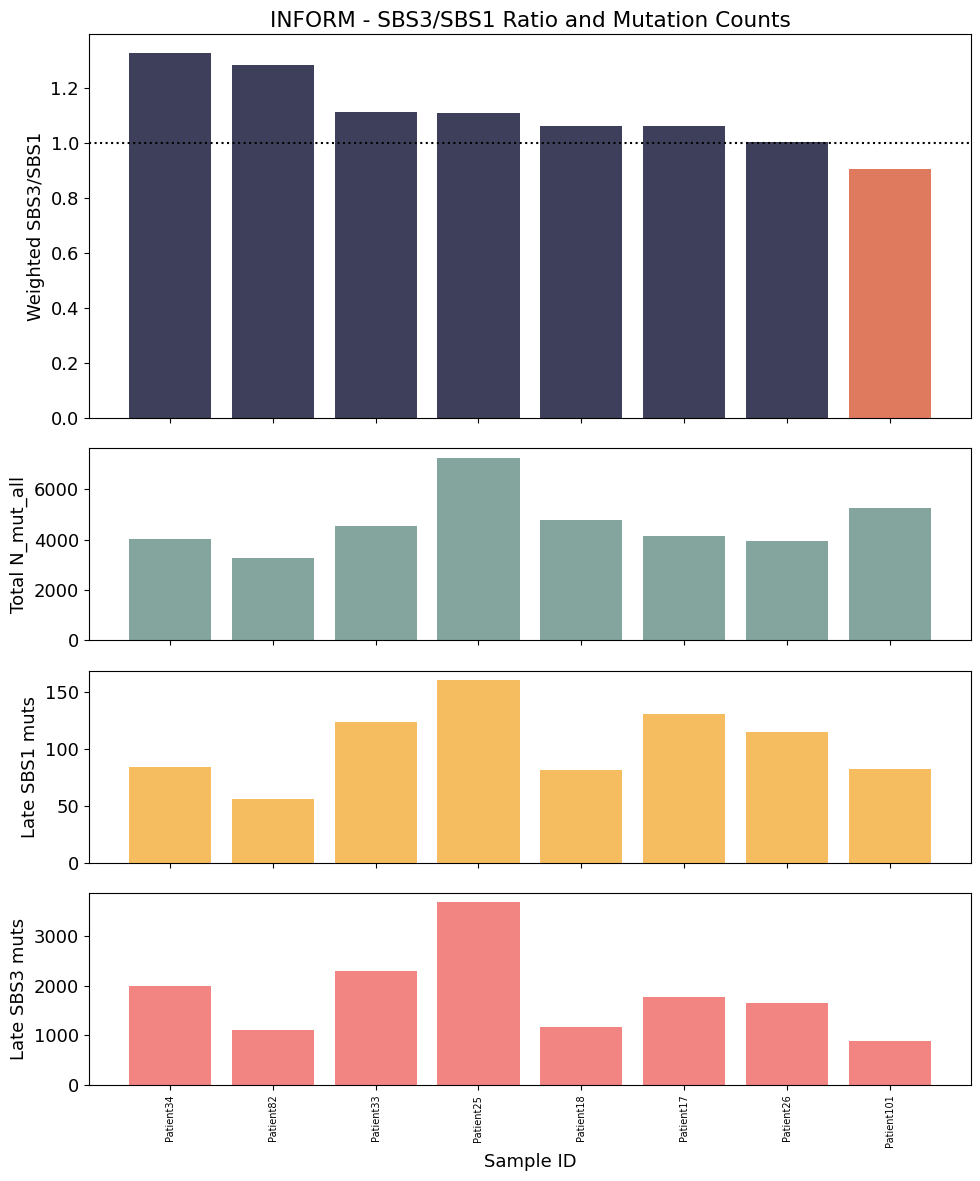

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def safe_eval_list(val):
    try:
        parsed = eval(val, {"nan": np.nan, "__builtins__": {}})
        if isinstance(parsed, list) and len(parsed) == 3:
            return [0 if pd.isna(x) else x for x in parsed]
        else:
            return [0, 0, 0]
    except:
        return [0, 0, 0]

def plot_combined_SBS3_SBS1_and_Nmut(filepath, title):
    df = pd.read_csv(filepath)

    for col in ['pi1SBS1', 'pi1SBS3', 'N_mut_all', 'Nt_SBS1', 'Nt_SBS3']:
        df[col] = df[col].apply(safe_eval_list)

    # Compute weighted SBS3/SBS1 ratio using N_mut_all
    def weighted_ratio(row):
        sbs1 = row['pi1SBS1']
        sbs3 = row['pi1SBS3']
        weights = row['N_mut_all']
        ratios = [s3 / s1 if s1 != 0 else 0 for s3, s1 in zip(sbs3, sbs1)]
        weighted_sum = sum(r * w for r, w in zip(ratios, weights))
        total_weight = sum(weights)
        return weighted_sum / total_weight if total_weight > 0 else 0

    df['weighted_SBS3_to_SBS1'] = df.apply(weighted_ratio, axis=1)
    df['total_N_mut'] = df['N_mut_all'].apply(sum)

    # Compute late SBS1 and SBS3 mutation counts using Nt_SBS1 and Nt_SBS3
    def compute_late(row, pi_col, nt_col):
        proportions = row[pi_col]
        nt_counts = row[nt_col]
        return sum(p * n for p, n in zip(proportions, nt_counts))

    df['late_SBS1_muts'] = df.apply(lambda r: compute_late(r, 'pi1SBS1', 'Nt_SBS1'), axis=1)
    df['late_SBS3_muts'] = df.apply(lambda r: compute_late(r, 'pi1SBS3', 'Nt_SBS3'), axis=1)

    # Sort by ratio
    plot_df = df.sort_values('weighted_SBS3_to_SBS1', ascending=False)

    colors = ['#E07A5F' if val < 1 else '#3E405B' for val in plot_df['weighted_SBS3_to_SBS1']]

    # Subplots
    fig, axes = plt.subplots(4, 1, figsize=(10, 12), sharex=True,
                             gridspec_kw={'height_ratios': [2, 1, 1, 1]})

    ax1, ax2, ax3, ax4 = axes

    ax1.bar(plot_df['ID'], plot_df['weighted_SBS3_to_SBS1'], color=colors)
    ax1.axhline(1, color='black', linestyle='dotted', linewidth=1.5)
    ax1.set_ylabel('Weighted SBS3/SBS1')
    ax1.set_title(f'{title} - SBS3/SBS1 Ratio and Mutation Counts')

    ax2.bar(plot_df['ID'], plot_df['total_N_mut'], color='#84A59D')
    ax2.set_ylabel('Total N_mut_all')

    ax3.bar(plot_df['ID'], plot_df['late_SBS1_muts'], color='#F6BD60')
    ax3.set_ylabel('Late SBS1 muts')

    ax4.bar(plot_df['ID'], plot_df['late_SBS3_muts'], color='#F28482')
    ax4.set_ylabel('Late SBS3 muts')
    ax4.set_xlabel('Sample ID')
    ax4.tick_params(axis='x', rotation=90, labelsize=7)

    plt.tight_layout()
    plt.show()

# File paths
files = {
    'SCANB': "/Users/michail/HMS Dropbox/Michail Andreopoulos/HRDTimer/data/output/May27_TimingRun/SCANB_Breast_WGD_HRD_TimingResults_timing_nboot200_0001_only_prob_change_boot.csv",
    'PCAWG': "/Users/michail/HMS Dropbox/Michail Andreopoulos/HRDTimer/data/output/May27_TimingRun/PCAWG_Breast_WGD_HRD_TimingResults_timing_nboot200_0001_only_prob_change_boot.csv",
    'INFORM': "/Users/michail/HMS Dropbox/Michail Andreopoulos/HRDTimer/data/output/May27_TimingRun/INFORM_Breast_WGD_HRD_TimingResults_timing_nboot200_0001_only_prob_change_boot.csv"
}

# Plot all
for label, path in files.items():
    plot_combined_SBS3_SBS1_and_Nmut(path, title=label)


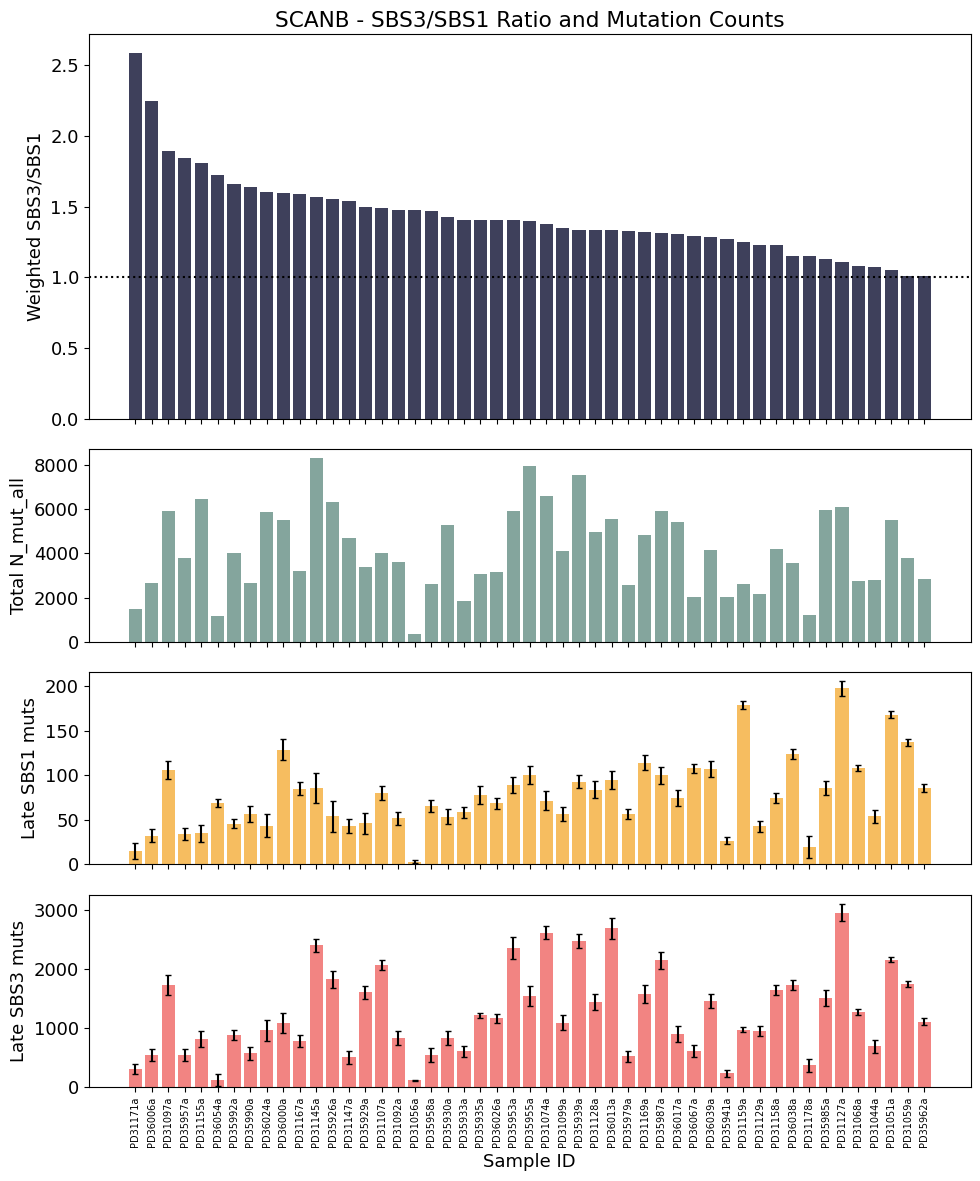

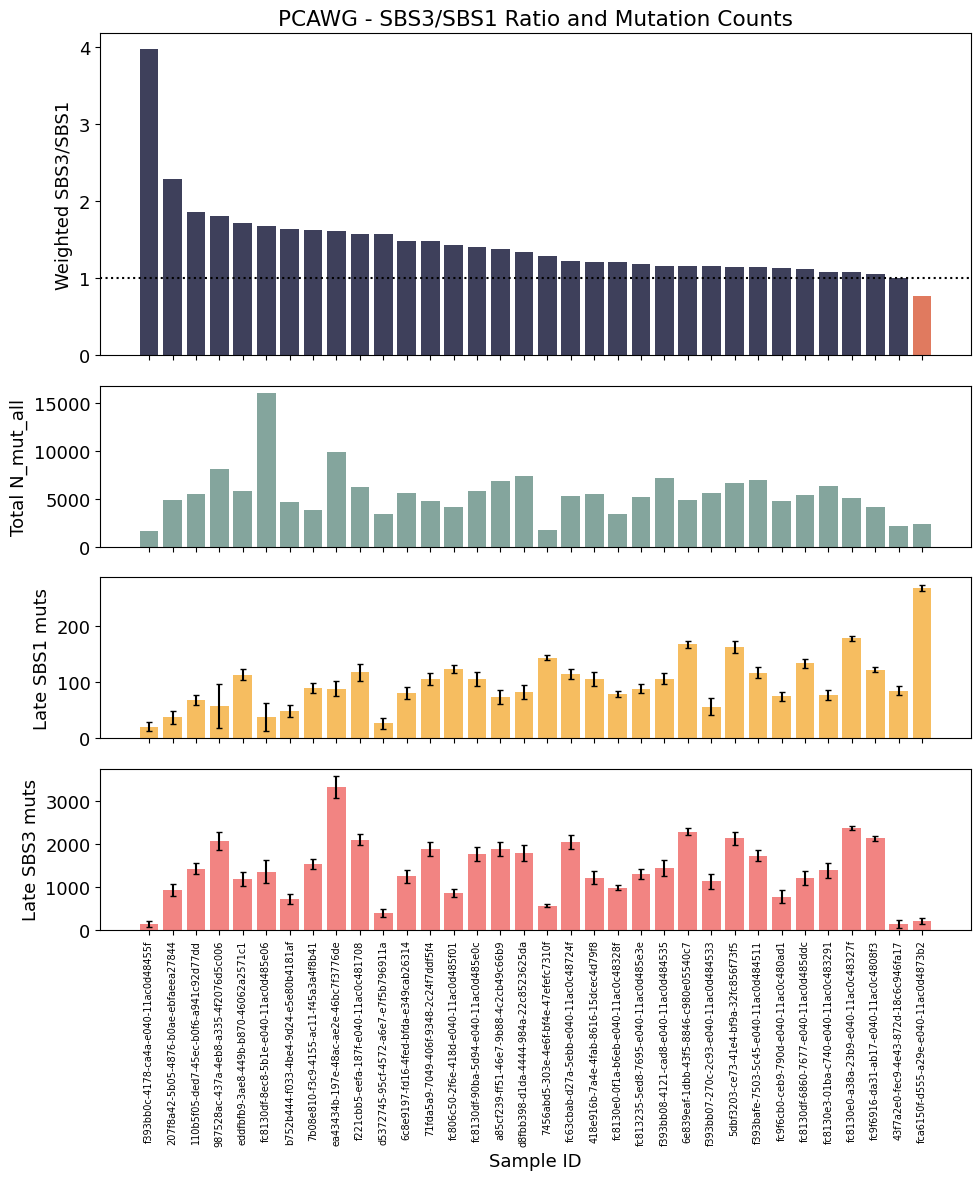

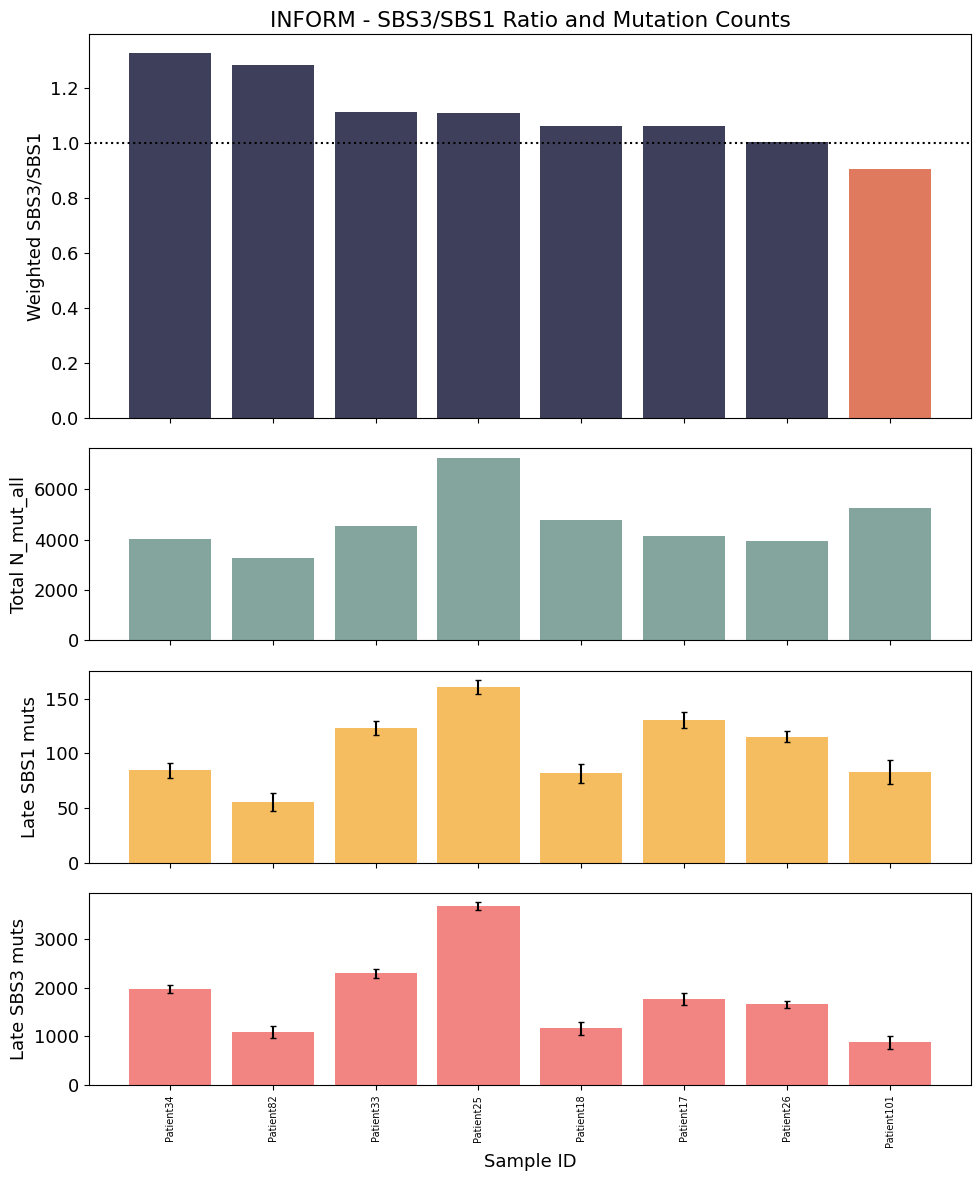

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def safe_eval_list(val):
    try:
        parsed = eval(val, {"nan": np.nan, "__builtins__": {}})
        if isinstance(parsed, list) and len(parsed) == 3:
            return [0 if pd.isna(x) else x for x in parsed]
        else:
            return [0, 0, 0]
    except:
        return [0, 0, 0]

def plot_combined_with_errors(filepath, title):
    df = pd.read_csv(filepath)

    for col in ['pi1SBS1', 'pi1SBS3', 'pi1SBS1_ci', 'pi1SBS3_ci',
                'N_mut_all', 'Nt_SBS1', 'Nt_SBS3']:
        df[col] = df[col].apply(safe_eval_list)

    # Weighted SBS3/SBS1 ratio
    def weighted_ratio(row):
        sbs1 = row['pi1SBS1']
        sbs3 = row['pi1SBS3']
        weights = row['N_mut_all']
        ratios = [s3 / s1 if s1 != 0 else 0 for s3, s1 in zip(sbs3, sbs1)]
        weighted_sum = sum(r * w for r, w in zip(ratios, weights))
        total_weight = sum(weights)
        return weighted_sum / total_weight if total_weight > 0 else 0

    df['weighted_SBS3_to_SBS1'] = df.apply(weighted_ratio, axis=1)
    df['total_N_mut'] = df['N_mut_all'].apply(sum)

    # Late mutation count with CI propagation
    def compute_late_with_ci(row, pi_col, nt_col, ci_col):
        pi = row[pi_col]
        nt = row[nt_col]
        ci = row[ci_col]
        value = sum(p * n for p, n in zip(pi, nt))
        error = sum(c * n for c, n in zip(ci, nt))
        return value, error

    df[['late_SBS1_muts', 'late_SBS1_err']] = df.apply(
        lambda r: pd.Series(compute_late_with_ci(r, 'pi1SBS1', 'Nt_SBS1', 'pi1SBS1_ci')),
        axis=1
    )

    df[['late_SBS3_muts', 'late_SBS3_err']] = df.apply(
        lambda r: pd.Series(compute_late_with_ci(r, 'pi1SBS3', 'Nt_SBS3', 'pi1SBS3_ci')),
        axis=1
    )

    # Sort by ratio
    plot_df = df.sort_values('weighted_SBS3_to_SBS1', ascending=False)

    colors = ['#E07A5F' if val < 1 else '#3E405B' for val in plot_df['weighted_SBS3_to_SBS1']]

    # Subplots
    fig, axes = plt.subplots(4, 1, figsize=(10, 12), sharex=True,
                             gridspec_kw={'height_ratios': [2, 1, 1, 1]})

    ax1, ax2, ax3, ax4 = axes

    ax1.bar(plot_df['ID'], plot_df['weighted_SBS3_to_SBS1'], color=colors)
    ax1.axhline(1, color='black', linestyle='dotted', linewidth=1.5)
    ax1.set_ylabel('Weighted SBS3/SBS1')
    ax1.set_title(f'{title} - SBS3/SBS1 Ratio and Mutation Counts')

    ax2.bar(plot_df['ID'], plot_df['total_N_mut'], color='#84A59D')
    ax2.set_ylabel('Total N_mut_all')

    # SBS1 with error bars
    ax3.bar(plot_df['ID'], plot_df['late_SBS1_muts'], color='#F6BD60', yerr=plot_df['late_SBS1_err'], capsize=2)
    ax3.set_ylabel('Late SBS1 muts')

    # SBS3 with error bars
    ax4.bar(plot_df['ID'], plot_df['late_SBS3_muts'], color='#F28482', yerr=plot_df['late_SBS3_err'], capsize=2)
    ax4.set_ylabel('Late SBS3 muts')
    ax4.set_xlabel('Sample ID')
    ax4.tick_params(axis='x', rotation=90, labelsize=7)

    plt.tight_layout()
    plt.show()

# File paths
files = {
    'SCANB': "/Users/michail/HMS Dropbox/Michail Andreopoulos/HRDTimer/data/output/May27_TimingRun/SCANB_Breast_WGD_HRD_TimingResults_timing_nboot200_0001_only_prob_change_boot.csv",
    'PCAWG': "/Users/michail/HMS Dropbox/Michail Andreopoulos/HRDTimer/data/output/May27_TimingRun/PCAWG_Breast_WGD_HRD_TimingResults_timing_nboot200_0001_only_prob_change_boot.csv",
    'INFORM': "/Users/michail/HMS Dropbox/Michail Andreopoulos/HRDTimer/data/output/May27_TimingRun/INFORM_Breast_WGD_HRD_TimingResults_timing_nboot200_0001_only_prob_change_boot.csv"
}

# Plot all
for label, path in files.items():
    plot_combined_with_errors(path, title=label)


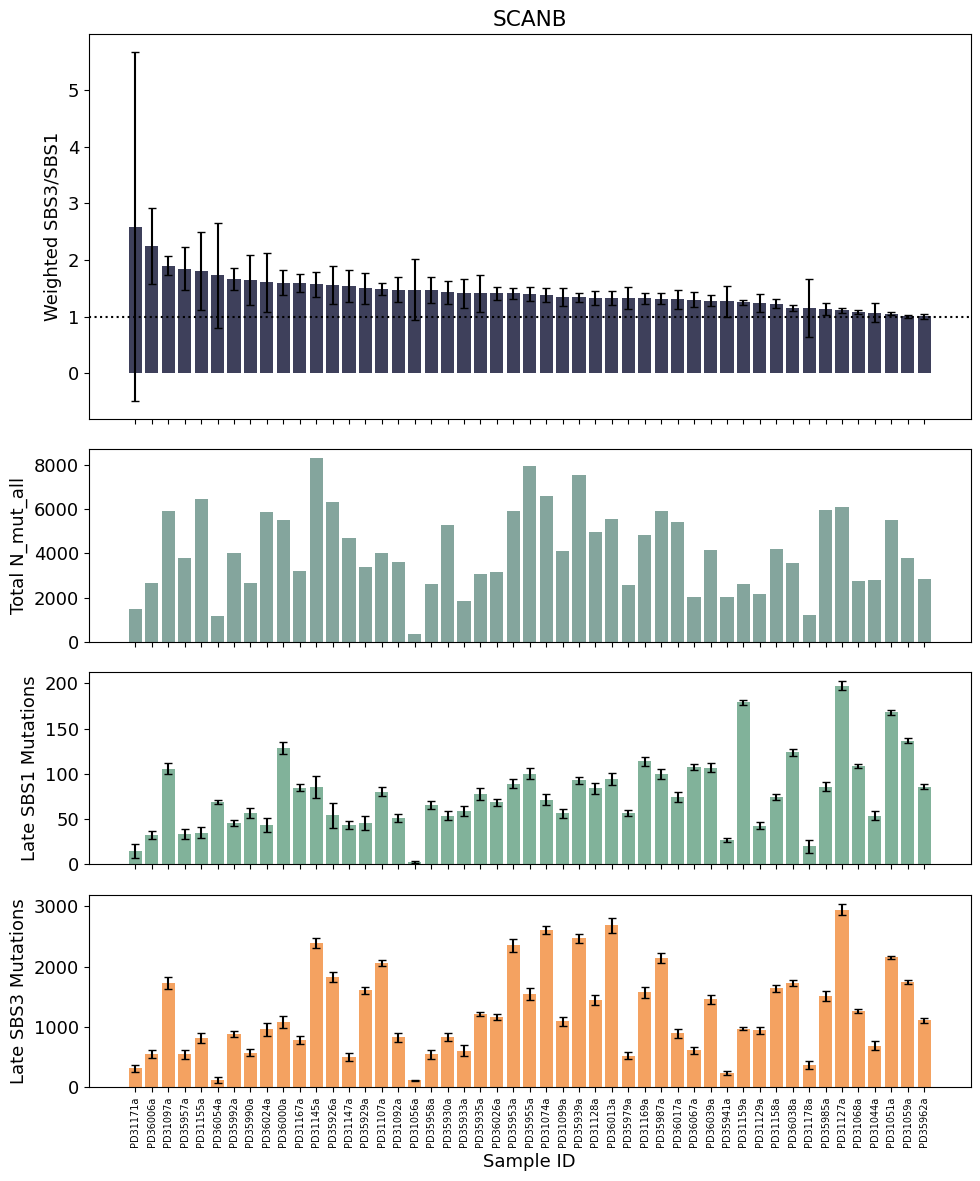

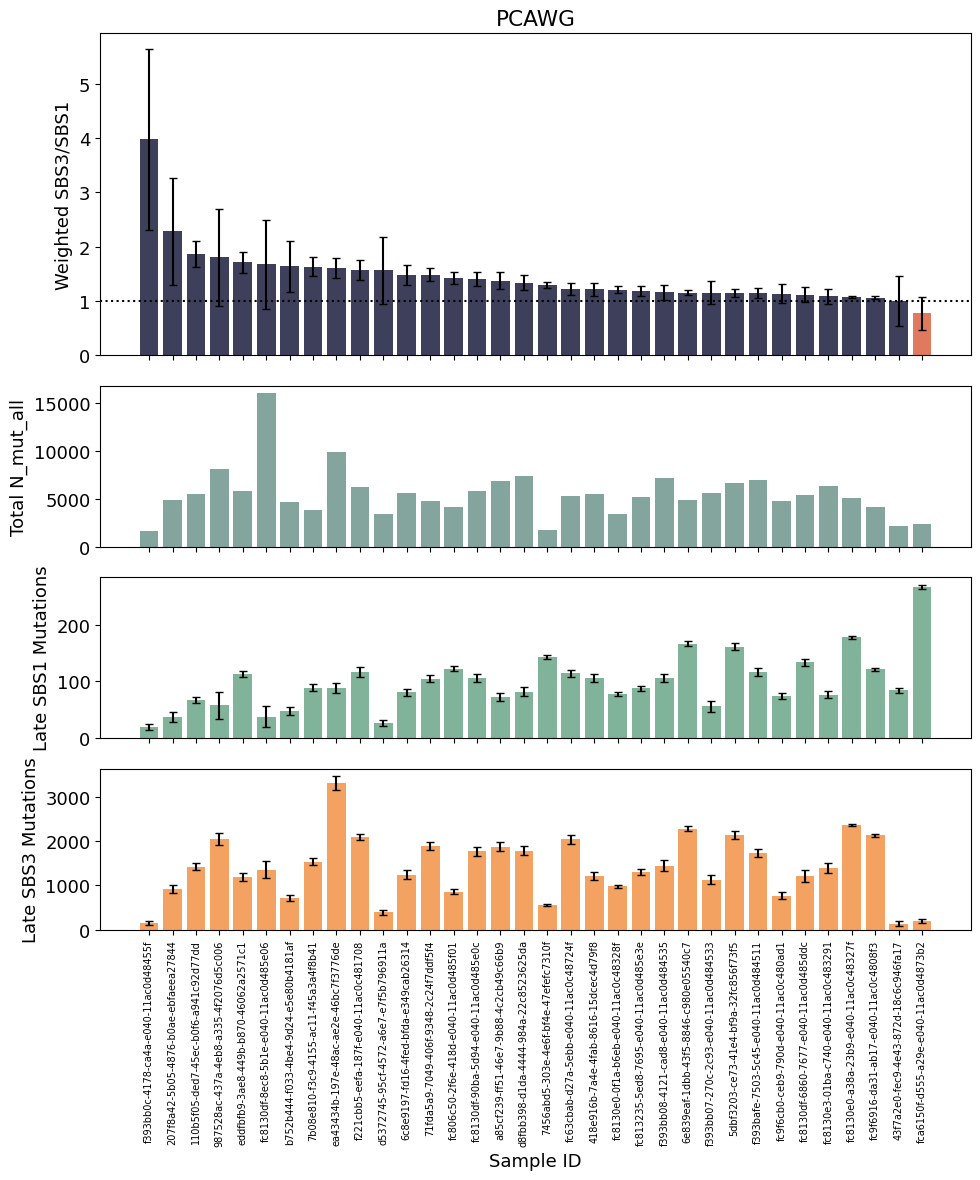

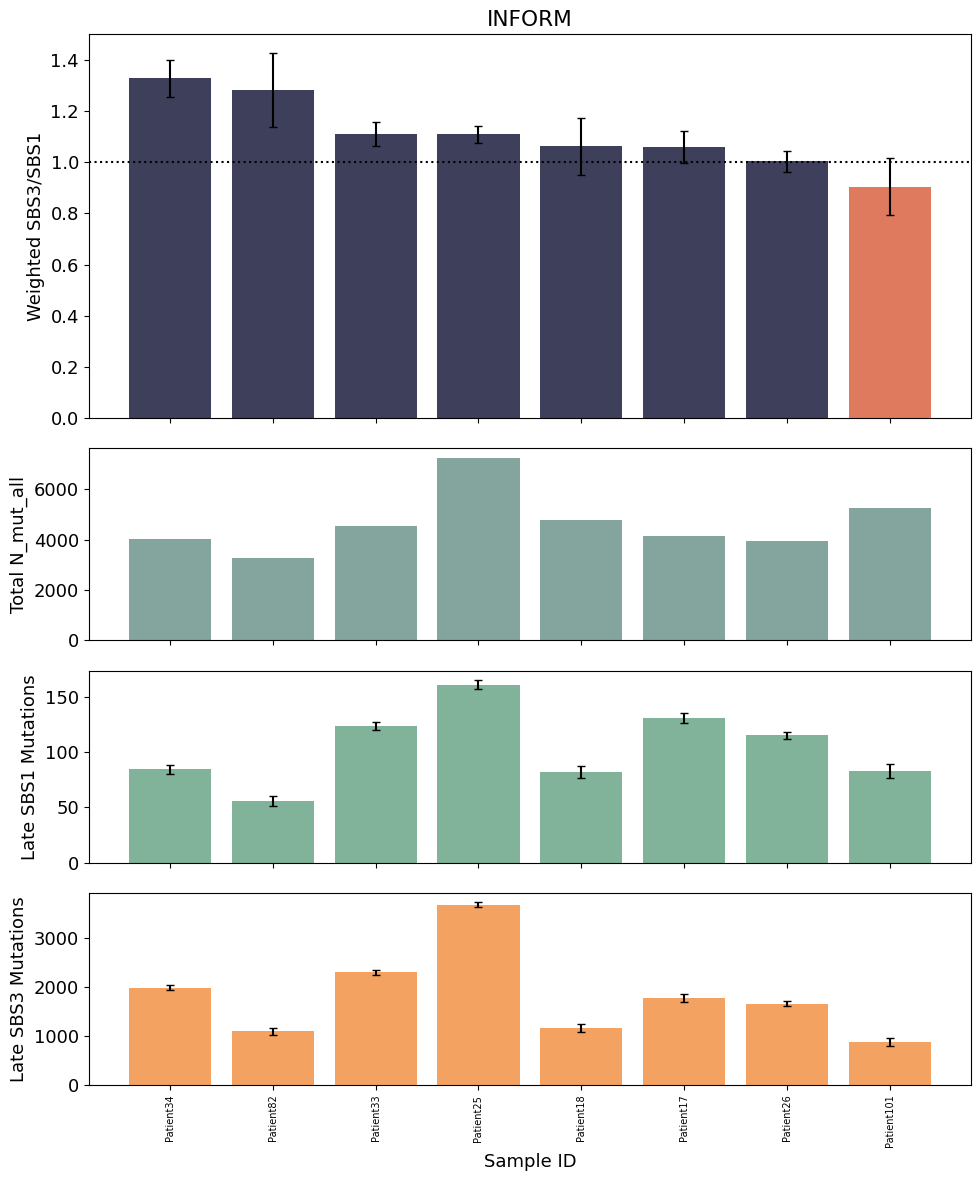

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def safe_eval_list(val):
    try:
        parsed = eval(val, {"nan": np.nan, "__builtins__": {}})
        if isinstance(parsed, list) and len(parsed) == 3:
            return [0 if pd.isna(x) else x for x in parsed]
        else:
            return [0, 0, 0]
    except:
        return [0, 0, 0]

def plot_weighted_SBS3_to_SBS1(filepath, title):
    df = pd.read_csv(filepath)

    # Parse list columns
    for col in ['pi1SBS1', 'pi1SBS3', 'pi1SBS1_ci', 'pi1SBS3_ci', 'N_mut_all', 'Nt_SBS1', 'Nt_SBS3']:
        df[col] = df[col].apply(safe_eval_list)

    # Compute weighted SBS3/SBS1 ratio and propagate error
    def compute_weighted_ratio_and_error(row):
        pi1 = row['pi1SBS1']
        pi3 = row['pi1SBS3']
        ci1 = row['pi1SBS1_ci']
        ci3 = row['pi1SBS3_ci']
        weights = row['N_mut_all']
        
        ratios = []
        variances = []
        for p3, p1, e3, e1 in zip(pi3, pi1, ci3, ci1):
            if p1 == 0 or p3 == 0:
                ratios.append(0)
                variances.append(0)
            else:
                r = p3 / p1
                ratios.append(r)
                var = r**2 * ((e3 / p3)**2 + (e1 / p1)**2)
                variances.append(var)

        weighted_ratio = sum(r * w for r, w in zip(ratios, weights)) / sum(weights) if sum(weights) > 0 else 0
        weighted_var = sum((w**2) * v for w, v in zip(weights, variances)) / (sum(weights)**2) if sum(weights) > 0 else 0
        return pd.Series([weighted_ratio, np.sqrt(weighted_var)])
    
    df['total_N_mut'] = df['N_mut_all'].apply(sum)
    df[['weighted_SBS3_to_SBS1', 'weighted_SBS3_to_SBS1_err']] = df.apply(compute_weighted_ratio_and_error, axis=1)

    # Compute late SBS1 and SBS3 mutations and propagate error
    def compute_late_mutations(row, pi_col, ci_col, nt_col):
        pi = row[pi_col]
        ci = row[ci_col]
        nt = row[nt_col]
        values = [p * n for p, n in zip(pi, nt)]
        errors = [c * n for c, n in zip(ci, nt)]
        return pd.Series([sum(values), np.sqrt(sum(e**2 for e in errors))])

    df[['late_SBS1_muts', 'late_SBS1_muts_err']] = df.apply(
        compute_late_mutations, axis=1, args=('pi1SBS1', 'pi1SBS1_ci', 'Nt_SBS1')
    )
    df[['late_SBS3_muts', 'late_SBS3_muts_err']] = df.apply(
        compute_late_mutations, axis=1, args=('pi1SBS3', 'pi1SBS3_ci', 'Nt_SBS3')
    )

    plot_df = df.sort_values('weighted_SBS3_to_SBS1', ascending=False)

    # Bar colors
    colors = ['#E07A5F' if val < 1 else '#3E405B' for val in plot_df['weighted_SBS3_to_SBS1']]

    # Plot subplots
    #fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 10), sharex=True)
        # Subplots
    fig, axes = plt.subplots(4, 1, figsize=(10, 12), sharex=True,
                             gridspec_kw={'height_ratios': [2, 1, 1, 1]})

    ax1, ax2, ax3, ax4 = axes

    # Weighted SBS3/SBS1 ratio
    ax1.bar(
        plot_df['ID'],
        plot_df['weighted_SBS3_to_SBS1'],
        yerr=plot_df['weighted_SBS3_to_SBS1_err'],
        color=colors,
        capsize=3
    )
    ax1.axhline(1, color='black', linestyle='dotted', linewidth=1.5)
    ax1.set_ylabel('Weighted SBS3/SBS1')
    ax1.set_title(f'{title}')

    ax2.bar(plot_df['ID'], plot_df['total_N_mut'], color='#84A59D')
    ax2.set_ylabel('Total N_mut_all')


    # Late SBS1 mutations
    ax3.bar(
        plot_df['ID'],
        plot_df['late_SBS1_muts'],
        yerr=plot_df['late_SBS1_muts_err'],
        color='#81B29A',
        capsize=3
    )
    ax3.set_ylabel('Late SBS1 Mutations')

    # Late SBS3 mutations
    ax4.bar(
        plot_df['ID'],
        plot_df['late_SBS3_muts'],
        yerr=plot_df['late_SBS3_muts_err'],
        color='#F4A261',
        capsize=3
    )
    ax4.set_ylabel('Late SBS3 Mutations')
    ax4.set_xlabel('Sample ID')
    ax4.set_xticks(range(len(plot_df['ID'])))
    ax4.set_xticklabels(plot_df['ID'], rotation=90, fontsize=7)

    plt.tight_layout()
    plt.show()

# Files dictionary
files = {
    'SCANB': "/Users/michail/HMS Dropbox/Michail Andreopoulos/HRDTimer/data/output/May27_TimingRun/SCANB_Breast_WGD_HRD_TimingResults_timing_nboot200_0001_only_prob_change_boot.csv",
    'PCAWG': "/Users/michail/HMS Dropbox/Michail Andreopoulos/HRDTimer/data/output/May27_TimingRun/PCAWG_Breast_WGD_HRD_TimingResults_timing_nboot200_0001_only_prob_change_boot.csv",
    'INFORM': "/Users/michail/HMS Dropbox/Michail Andreopoulos/HRDTimer/data/output/May27_TimingRun/INFORM_Breast_WGD_HRD_TimingResults_timing_nboot200_0001_only_prob_change_boot.csv"
}

# Apply function
for label, path in files.items():
    plot_weighted_SBS3_to_SBS1(path, title=label)


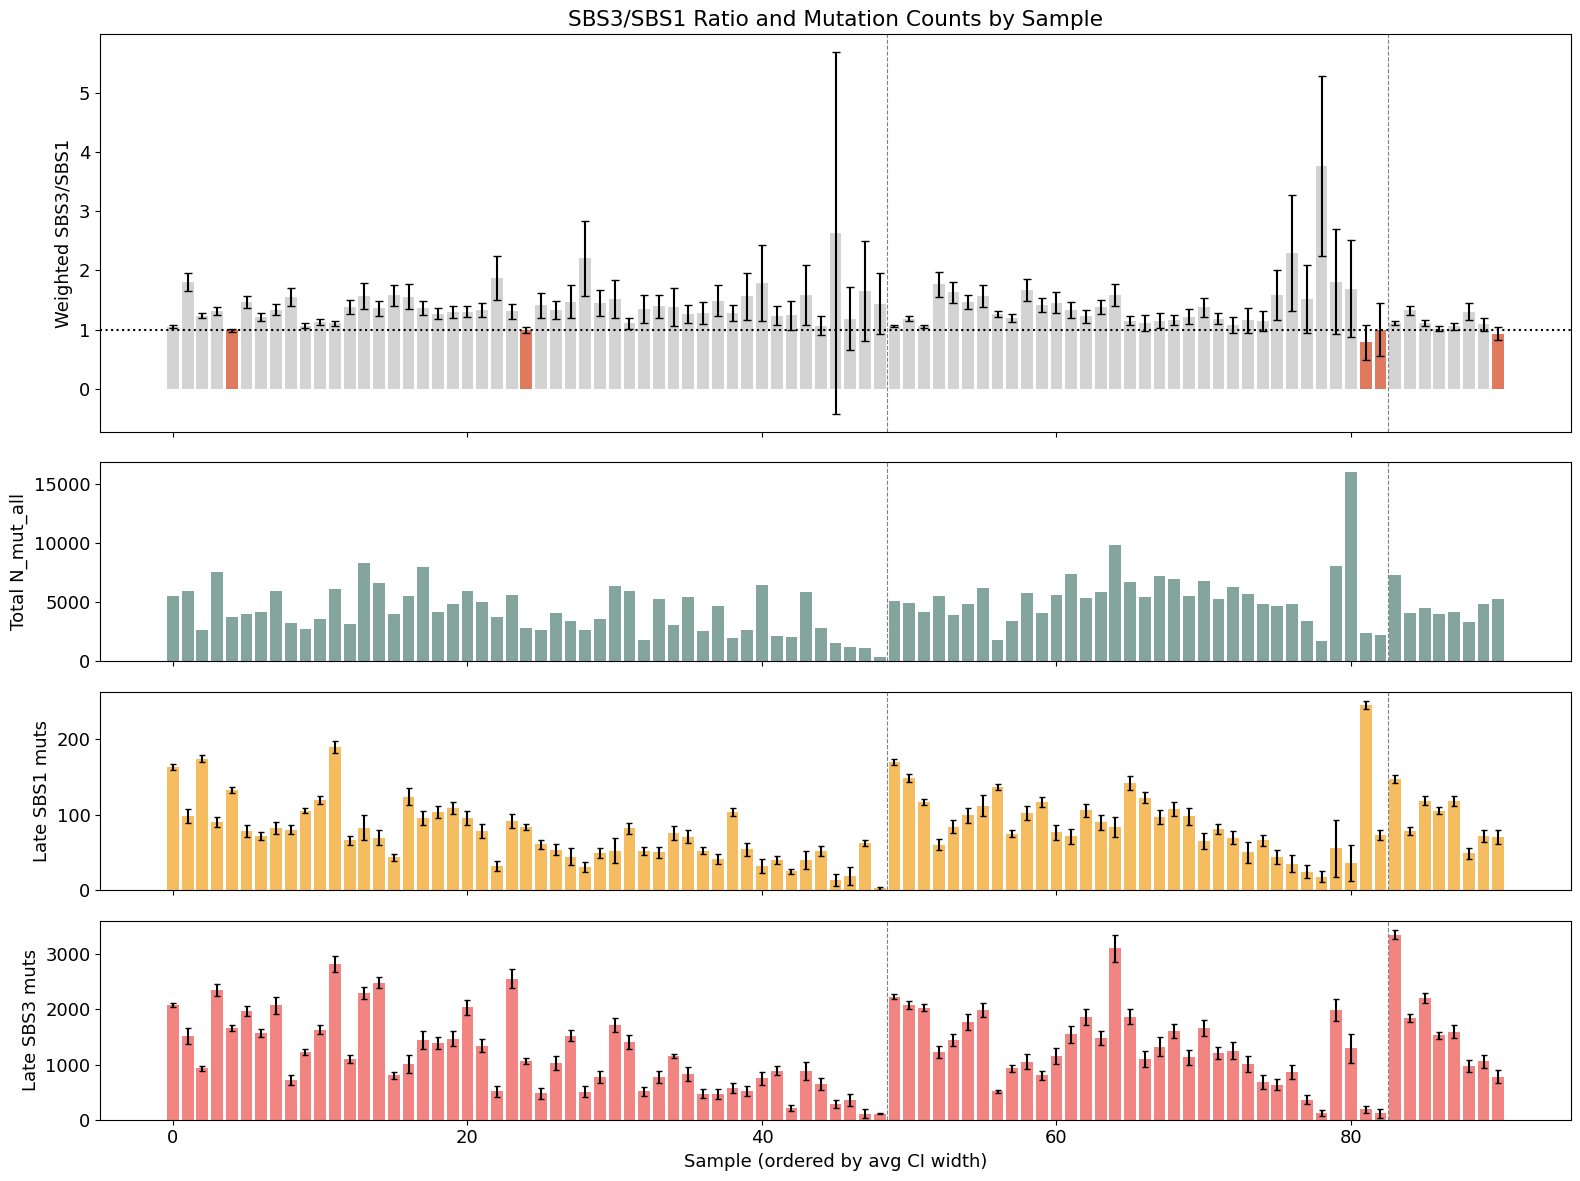

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Files dictionary
files = {
    'SCANB': "/Users/michail/HMS Dropbox/Michail Andreopoulos/HRDTimer/data/output/May27_TimingRun/SCANB_Breast_WGD_HRD_TimingResults_timing_nboot200_0001_only_prob_change_boot.csv",
    'PCAWG': "/Users/michail/HMS Dropbox/Michail Andreopoulos/HRDTimer/data/output/May27_TimingRun/PCAWG_Breast_WGD_HRD_TimingResults_timing_nboot200_0001_only_prob_change_boot_pSub.csv",
    'INFORM': "/Users/michail/HMS Dropbox/Michail Andreopoulos/HRDTimer/data/output/May27_TimingRun/INFORM_Breast_WGD_HRD_TimingResults_timing_nboot200_0001_only_prob_change_boot_pSub.csv"
}

# ------------------ Helper functions ------------------ #

def safe_eval_list(val):
    try:
        parsed = eval(val, {"nan": np.nan, "__builtins__": {}})
        if isinstance(parsed, list) and len(parsed) == 3:
            return [0 if pd.isna(x) else x for x in parsed]
        else:
            return [0, 0, 0]
    except:
        return [0, 0, 0]

def weighted_ratio(row):
    sbs1 = row['pi1SBS1']
    sbs3 = row['pi1SBS3']
    weights = row['N_mut_all']
    ratios = [s3 / s1 if s1 != 0 else 0 for s3, s1 in zip(sbs3, sbs1)]
    weighted_sum = sum(r * w for r, w in zip(ratios, weights))
    total_weight = sum(weights)
    return weighted_sum / total_weight if total_weight > 0 else 0

def compute_late_with_ci(row, pi_col, nt_col, ci_col):
    pi = row[pi_col]
    nt = row[nt_col]
    ci = row[ci_col]
    value = sum(p * n for p, n in zip(pi, nt))
    error = sum(c * n for c, n in zip(ci, nt))
    return value, error

# ------------------ Main preparation and plotting ------------------ #

def prepare_and_plot_combined(files):
    x_pos, cohort_boundaries, dfs = 0, [], []
    sample_order_dict = {}

    # Prepare CI and timing data
    for cohort, f in files.items():
        df = pd.read_csv(f)[[
            'ID',
            'HRDTime', 'HRDTime_ci_lo', 'HRDTime_ci_hi', 'HRDTime_ci_IQR_lo', 'HRDTime_ci_IQR_hi',
            'WGDTime', 'WGDTime_ci_lo', 'WGDTime_ci_hi', 'WGDTime_ci_IQR_lo', 'WGDTime_ci_IQR_hi',
            'pi1SBS1', 'pi1SBS3', 'pi1SBS1_ci', 'pi1SBS3_ci',
            'N_mut_all', 'Nt_SBS1', 'Nt_SBS3'
        ]].dropna()

        # Remove invalid rows
        invalid_mask = (
            (df['HRDTime_ci_lo'] < 0) |
            (df['HRDTime_ci_hi'] < 0) |
            (df['WGDTime_ci_lo'] < 0) |
            (df['WGDTime_ci_hi'] < 0) |
            (df['HRDTime_ci_IQR_lo'] < 0) |
            (df['HRDTime_ci_IQR_hi'] < 0) |
            (df['WGDTime_ci_IQR_lo'] < 0) |
            (df['WGDTime_ci_IQR_hi'] < 0)
        )
        df = df[~invalid_mask].copy()

        # Convert strings to lists
        for col in ['pi1SBS1', 'pi1SBS3', 'pi1SBS1_ci', 'pi1SBS3_ci', 'N_mut_all', 'Nt_SBS1', 'Nt_SBS3']:
            df[col] = df[col].apply(safe_eval_list)

        # Sort by average CI width
        df['mean_ci_range'] = (df['HRDTime_ci_hi'] + df['HRDTime_ci_lo'])
        df = df.sort_values('mean_ci_range').reset_index(drop=True)

        # Store sample ID order
        sample_order_dict[cohort] = df['ID'].tolist()

        # Assign x position for global alignment
        df['Dataset'] = cohort
        df['x'] = range(x_pos, x_pos + len(df))
        x_pos += len(df)
        cohort_boundaries.append(x_pos)
        dfs.append(df)

    df_all = pd.concat(dfs, ignore_index=True)

    def compute_weighted_ratio_and_error(row):
        pi1 = row['pi1SBS1']
        pi3 = row['pi1SBS3']
        ci1 = row['pi1SBS1_ci']
        ci3 = row['pi1SBS3_ci']
        weights = row['N_mut_all']
        
        ratios = []
        variances = []
        for p3, p1, e3, e1 in zip(pi3, pi1, ci3, ci1):
            if p1 == 0 or p3 == 0:
                ratios.append(0)
                variances.append(0)
            else:
                r = p3 / p1
                ratios.append(r)
                var = r**2 * ((e3 / p3)**2 + (e1 / p1)**2)
                variances.append(var)

        weighted_ratio = sum(r * w for r, w in zip(ratios, weights)) / sum(weights) if sum(weights) > 0 else 0
        weighted_var = sum((w**2) * v for w, v in zip(weights, variances)) / (sum(weights)**2) if sum(weights) > 0 else 0
        return pd.Series([weighted_ratio, np.sqrt(weighted_var)])
    
    df_all['total_N_mut'] = df_all['N_mut_all'].apply(sum)
    df_all[['weighted_SBS3_to_SBS1', 'weighted_SBS3_to_SBS1_err']] = df_all.apply(compute_weighted_ratio_and_error, axis=1)

    # Derived metrics
    #df_all['weighted_SBS3_to_SBS1'] = df_all.apply(weighted_ratio, axis=1)
    #df_all['total_N_mut'] = df_all['N_mut_all'].apply(sum)
    df_all[['late_SBS1_muts', 'late_SBS1_err']] = df_all.apply(
        lambda r: pd.Series(compute_late_with_ci(r, 'pi1SBS1', 'Nt_SBS1', 'pi1SBS1_ci')),
        axis=1
    )
    df_all[['late_SBS3_muts', 'late_SBS3_err']] = df_all.apply(
        lambda r: pd.Series(compute_late_with_ci(r, 'pi1SBS3', 'Nt_SBS3', 'pi1SBS3_ci')),
        axis=1
    )

    df_to_save = df_all[['ID', 'HRDTime','HRDTime_ci_lo','HRDTime_ci_hi','HRDTime_ci_IQR_lo','HRDTime_ci_IQR_hi','WGDTime', \
                         'WGDTime_ci_lo','WGDTime_ci_hi','WGDTime_ci_IQR_lo','WGDTime_ci_IQR_hi','total_N_mut', 'weighted_SBS3_to_SBS1',\
                         'weighted_SBS3_to_SBS1_err']]
    df_to_save.to_csv("HRDTimer_filters2.csv")

    # Plotting
    fig, axes = plt.subplots(4, 1, figsize=(16, 12), sharex=True,
                             gridspec_kw={'height_ratios': [2, 1, 1, 1]})
    ax1, ax2, ax3, ax4 = axes

    # Bar colors based on ratio
    colors = ['#E07A5F' if val < 1 else 'lightgrey' for val in df_all['weighted_SBS3_to_SBS1']]

    ax1.bar(
        df_all['x'],
        df_all['weighted_SBS3_to_SBS1'],
        yerr=df_all['weighted_SBS3_to_SBS1_err'],
        color=colors,
        capsize=3
    )
    #ax1.bar(df_all['x'], df_all['weighted_SBS3_to_SBS1'], color=colors)
    ax1.axhline(1, color='black', linestyle='dotted', linewidth=1.5)
    ax1.set_ylabel('Weighted SBS3/SBS1')
    ax1.set_title('SBS3/SBS1 Ratio and Mutation Counts by Sample')

    ax2.bar(df_all['x'], df_all['total_N_mut'], color='#84A59D')
    ax2.set_ylabel('Total N_mut_all')

    ax3.bar(df_all['x'], df_all['late_SBS1_muts'], color='#F6BD60',
            yerr=df_all['late_SBS1_err'], capsize=2)
    ax3.set_ylabel('Late SBS1 muts')

    ax4.bar(df_all['x'], df_all['late_SBS3_muts'], color='#F28482',
            yerr=df_all['late_SBS3_err'], capsize=2)
    ax4.set_ylabel('Late SBS3 muts')
    ax4.set_xlabel('Sample (ordered by avg CI width)')

    for boundary in cohort_boundaries[:-1]:
        for ax in axes:
            ax.axvline(boundary -0.5, color='gray', linestyle='dashed', linewidth=0.8)

    plt.tight_layout()
    plt.savefig("AllStats.pdf", format='pdf', bbox_inches='tight')
    plt.show()

    return sample_order_dict  # Return ordered sample lists

# ------------------ Run and get ordered lists ------------------ #
sample_orders = prepare_and_plot_combined(files)

# Optional: use these elsewhere
scanb_ids = sample_orders['SCANB']
pcawg_ids = sample_orders['PCAWG']
inform_ids = sample_orders['INFORM']


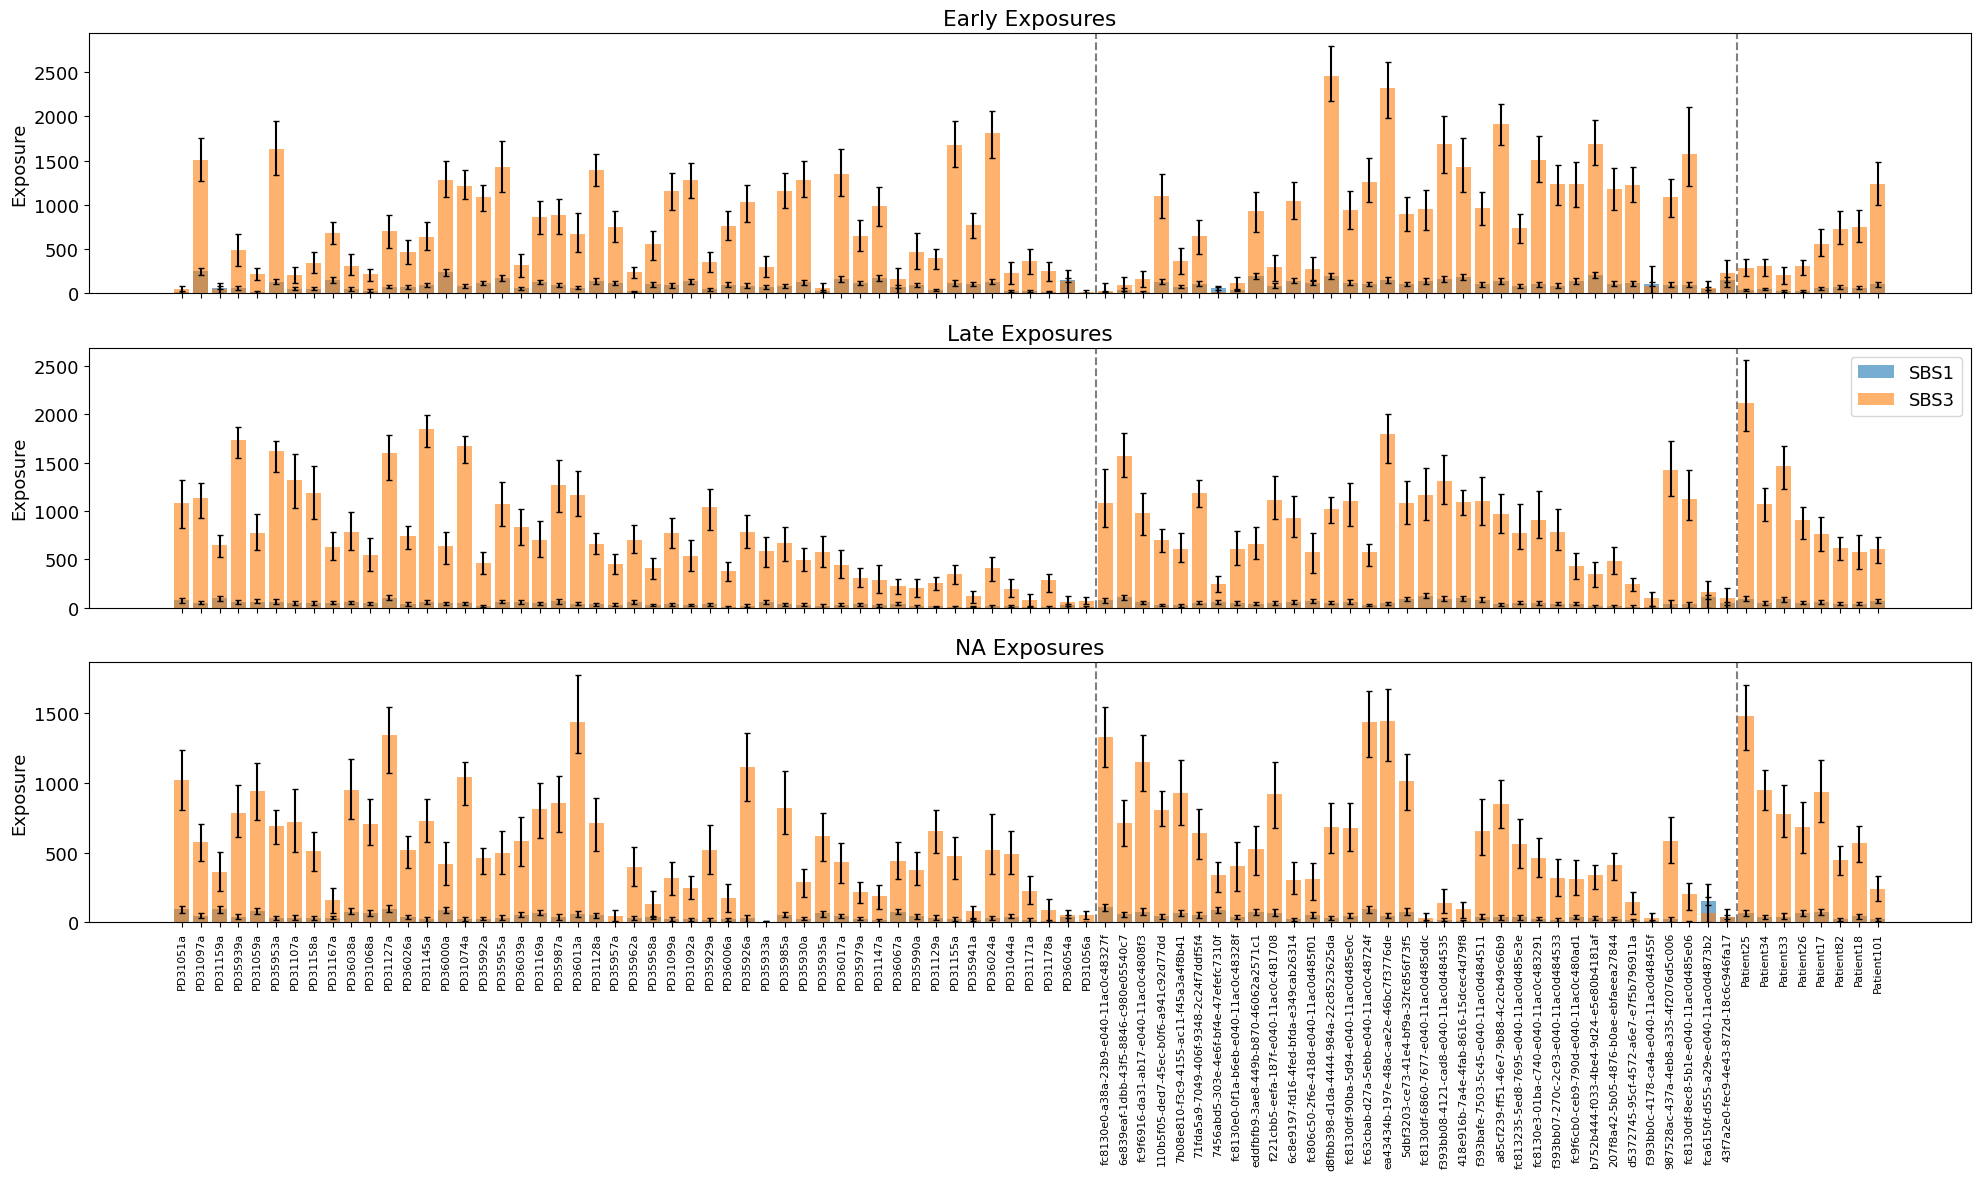

In [103]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Base paths for each cohort
cohort_paths = {
    'PCAWG': '/Users/michail/HMS Dropbox/Michail Andreopoulos/HRDTimer/temp/PCAWG_Breast_boot_only_p_change',
    'SCANB': '/Users/michail/HMS Dropbox/Michail Andreopoulos/HRDTimer/temp/SCANB_Breast_boot_only_p_change',
    'INFORM': '/Users/michail/HMS Dropbox/Michail Andreopoulos/HRDTimer/temp/INFORM_Breast_boot_only_p_change'
}

# Time periods
periods = ['Early', 'Late', 'NA']
signatures = ['SBS1', 'SBS3']


full_order = sample_orders['SCANB'] + sample_orders['PCAWG'] + sample_orders['INFORM']

def load_bootstraps(base_path, period):
    """Load all bootstrap files for a period from a given cohort path."""
    bootstrap_files = glob.glob(os.path.join(base_path, f'bootstrap_*/exposures_{period}.csv'))
    all_data = []
    for f in bootstrap_files:
        df = pd.read_csv(f, index_col=0)
        if all(sig in df.columns for sig in signatures):
            df = df[signatures]
            all_data.append(df)
    return all_data

def summarize_exposures(bootstraps):
    """Compute mean and 95% CI for each sample-signature."""
    all_samples = bootstraps[0].index
    summary = []
    for sample in all_samples:
        for sig in signatures:
            values = np.array([df.loc[sample, sig] for df in bootstraps])
            summary.append({
                'Sample': sample,
                'Signature': sig,
                'Mean': np.mean(values),
                'Lower': np.percentile(values, 2.5),
                'Upper': np.percentile(values, 97.5)
            })
    return pd.DataFrame(summary)

# Collect all summaries
all_summaries = []

for cohort, base_path in cohort_paths.items():
    for period in periods:
        bootstraps = load_bootstraps(base_path, period)
        if not bootstraps:
            continue
        summary_df = summarize_exposures(bootstraps)
        summary_df['Period'] = period
        summary_df['Cohort'] = cohort
        all_summaries.append(summary_df)

# Combine into one DataFrame
final_df = pd.concat(all_summaries)
final_df['Sample'] = pd.Categorical(final_df['Sample'], categories=full_order, ordered=True)
final_df = final_df.sort_values('Sample')

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(20, 12), sharex=True)
period_to_ax = dict(zip(periods, axes))

for period in periods:
    ax = period_to_ax[period]
    subset = final_df[final_df['Period'] == period]
    for sig in signatures:
        sig_data = subset[subset['Signature'] == sig]
        ax.bar(sig_data['Sample'], sig_data['Mean'], label=sig, alpha=0.6)
        ax.errorbar(sig_data['Sample'], sig_data['Mean'],
                    yerr=[sig_data['Mean'] - sig_data['Lower'], sig_data['Upper'] - sig_data['Mean']],
                    fmt='none', ecolor='black', capsize=2)
    ax.set_title(f'{period} Exposures')
    ax.axhline(0, color='black', linewidth=0.5)
    ax.set_ylabel('Exposure')
    if period == 'Late':
        ax.legend()

# Add grey vertical lines between cohorts
cohort_lengths = [len(sample_orders['SCANB']), len(sample_orders['PCAWG']), len(sample_orders['INFORM'])]
vline_positions = np.cumsum(cohort_lengths)[:-1]

for ax in axes:
    for pos in vline_positions:
        ax.axvline(pos - 0.5, color='grey', linestyle='--')

# Set x-axis labels
axes[-1].set_xticks(range(len(full_order)))
axes[-1].set_xticklabels(full_order, rotation=90, fontsize=8)

plt.tight_layout()
plt.show()


Samples where SBS1 has sub-zero 95% CI in at least one period (Early, Late, NA):
PD31145a
PD35957a
PD35929a
PD36006a
PD35926a
PD35933a
PD35935a
PD35990a
PD31155a
PD36024a
PD31171a
PD31178a
PD31056a
418e916b-7a4e-4fab-8616-15dcec4d79f8
f393bb07-270c-2c93-e040-11ac0d484533
b752b444-f033-4be4-9d24-e5e80b4181af
207f8a42-5b05-4876-b0ae-ebfaeea27844
d5372745-95cf-4572-a6e7-e7f5b796911a
f393bb0c-4178-ca4a-e040-11ac0d48455f
987528ac-437a-4eb8-a335-4f2076d5c006
fc8130df-8ec8-5b1e-e040-11ac0d485e06


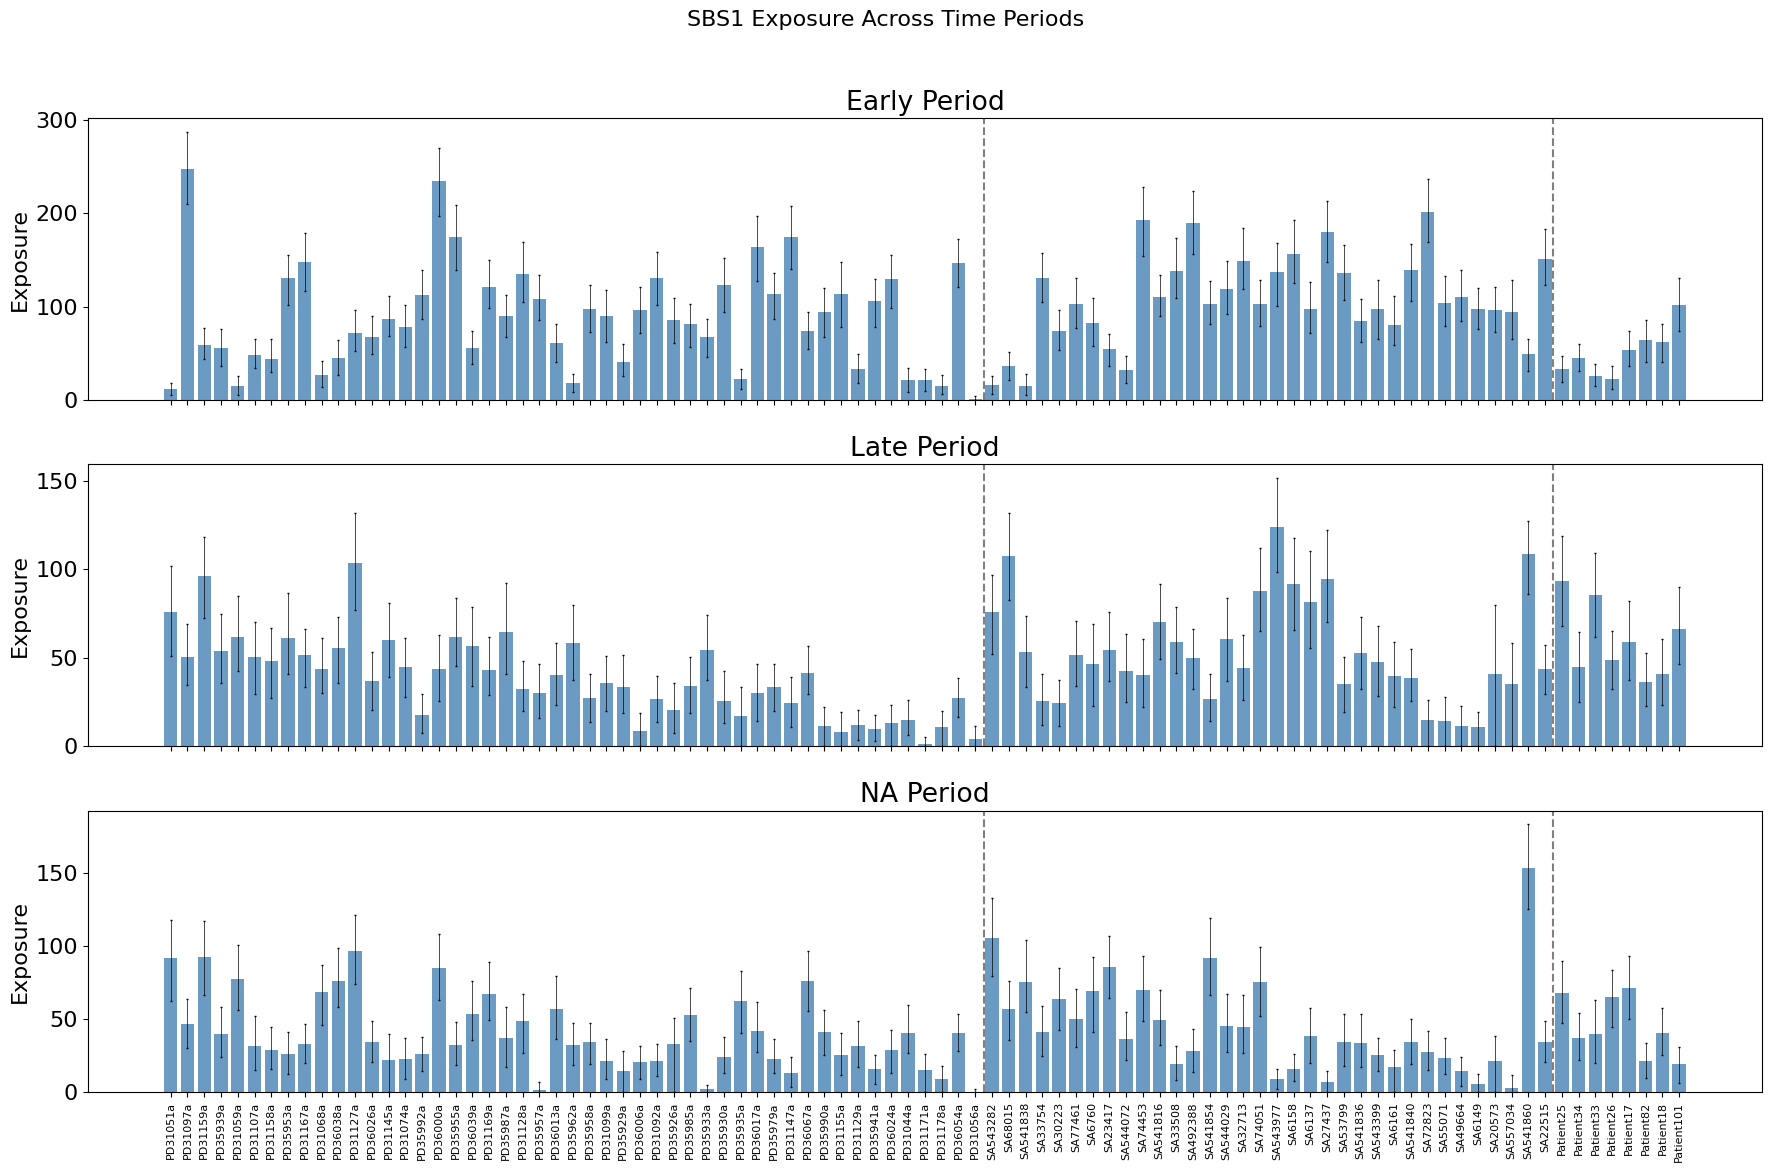

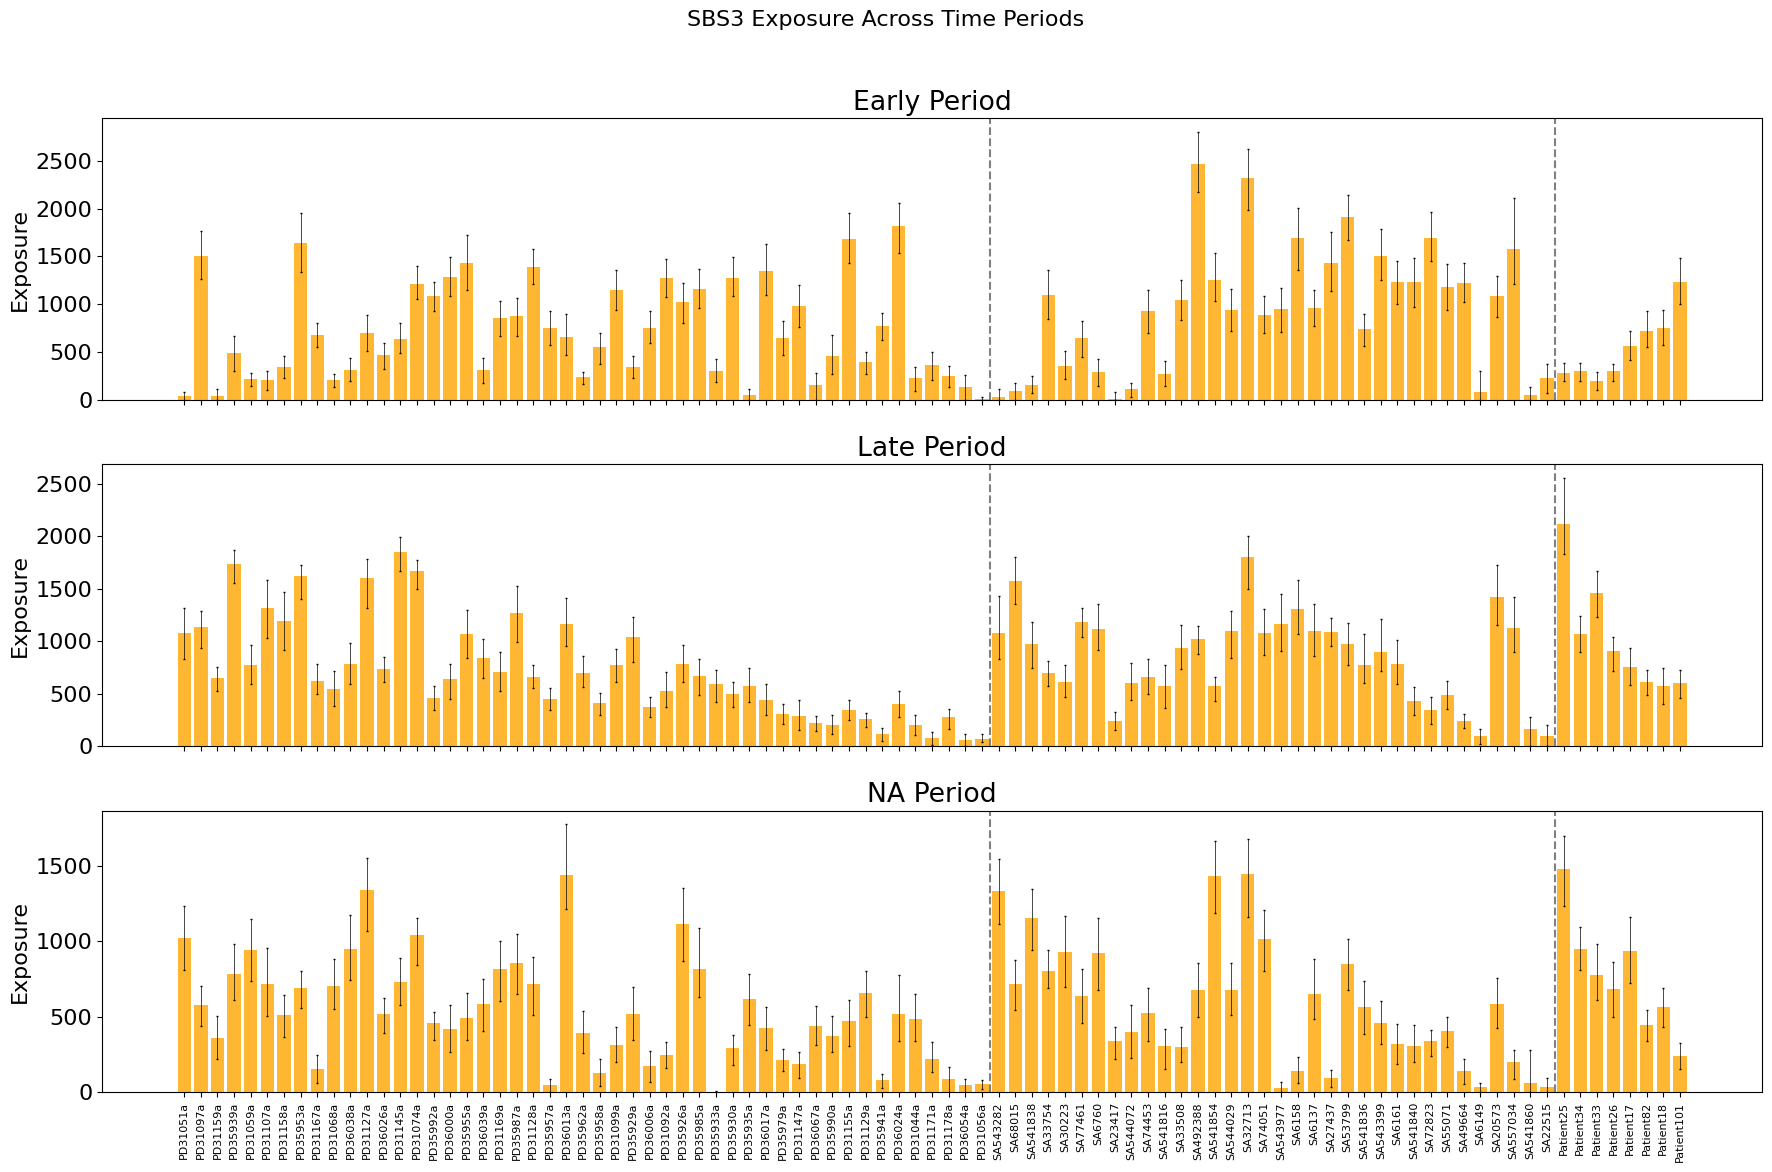

In [16]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.size'] = 16

# === CONFIG ===
cohort_paths = {
    'PCAWG': '/Users/michail/HMS Dropbox/Michail Andreopoulos/HRDTimer/temp/PCAWG_Breast_boot_only_p_change',
    'SCANB': '/Users/michail/HMS Dropbox/Michail Andreopoulos/HRDTimer/temp/SCANB_Breast_boot_only_p_change',
    'INFORM': '/Users/michail/HMS Dropbox/Michail Andreopoulos/HRDTimer/temp/INFORM_Breast_boot_only_p_change'
}

periods = ['Early', 'Late', 'NA']

signatures = ['SBS1', 'SBS3']
signature_colors = {
    'SBS1': 'steelblue',
    'SBS3': 'orange'
}

full_order = sample_orders['SCANB'] + sample_orders['PCAWG'] + sample_orders['INFORM']

metadata = pd.read_csv("/Users/michail/HMS Dropbox/Michail Andreopoulos/HRDTimer/data/metadata/pan_metadata_v5.csv")
sample_display_map = metadata.set_index('sample')['sample.display'].to_dict()

x_tick_labels = [sample_display_map.get(s, s) for s in full_order]  # fallback to ID if not found


def load_bootstraps(base_path, period):
    bootstrap_files = glob.glob(os.path.join(base_path, f'bootstrap_*/exposures_{period}.csv'))
    all_data = []
    for f in bootstrap_files:
        df = pd.read_csv(f, index_col=0)
        if all(sig in df.columns for sig in signatures):
            df = df[signatures]
            all_data.append(df)
    return all_data

def summarize_exposures(bootstraps):
    all_samples = bootstraps[0].index
    summary = []
    for sample in all_samples:
        for sig in signatures:
            values = np.array([df.loc[sample, sig] for df in bootstraps])
            summary.append({
                'Sample': sample,
                'Signature': sig,
                'Mean': np.mean(values),
                'Lower': np.percentile(values, 2.5),
                'Upper': np.percentile(values, 97.5)
            })
    return pd.DataFrame(summary)

# === DATA PROCESSING ===
all_summaries = []

for cohort, base_path in cohort_paths.items():
    for period in periods:
        bootstraps = load_bootstraps(base_path, period)
        if not bootstraps:
            continue
        summary_df = summarize_exposures(bootstraps)
        summary_df['Period'] = period
        summary_df['Cohort'] = cohort
        all_summaries.append(summary_df)

final_df = pd.concat(all_summaries)
final_df['Sample'] = pd.Categorical(final_df['Sample'], categories=full_order, ordered=True)
final_df = final_df.sort_values('Sample')

# Filter for SBS1 only
sbs1_df = final_df[final_df['Signature'] == 'SBS1']

# Find rows where lower CI is below zero
subzero_rows = sbs1_df[sbs1_df['Lower'] == 0]

# Get unique sample IDs with at least one sub-zero CI in any period
subzero_samples = subzero_rows['Sample'].unique()

# Print the results
print("Samples where SBS1 has sub-zero 95% CI in at least one period (Early, Late, NA):")
for sample in subzero_samples:
    print(sample)

# === PLOTTING LOOP FOR SBS1 AND SBS3 ===
for sig in signatures:
    fig, axes = plt.subplots(3, 1, figsize=(18, 12), sharex=True)
    period_to_ax = dict(zip(periods, axes))
    fig.suptitle(f"{sig} Exposure Across Time Periods", fontsize=16)

    for period in periods:
        ax = period_to_ax[period]
        subset = final_df[(final_df['Period'] == period) & (final_df['Signature'] == sig)]
        ax.bar(subset['Sample'], subset['Mean'], label=sig, alpha=0.8, color=signature_colors[sig])
        ax.errorbar(subset['Sample'], subset['Mean'],
                    yerr=[subset['Mean'] - subset['Lower'], subset['Upper'] - subset['Mean']],
                    fmt='none', ecolor='black', capsize=1, elinewidth=0.5)
        ax.set_title(f'{period} Period')
        ax.set_ylabel('Exposure')
        ax.axhline(0, color='black', linewidth=0.5)

    # Add vertical lines between cohorts
    cohort_lengths = [len(sample_orders['SCANB']), len(sample_orders['PCAWG']), len(sample_orders['INFORM'])]
    vline_positions = np.cumsum(cohort_lengths)[:-1]
    for ax in axes:
        for pos in vline_positions:
            ax.axvline(pos - 0.5, color='grey', linestyle='--')

    axes[-1].set_xticks(range(len(full_order)))
    #axes[-1].set_xticklabels(full_order, rotation=90, fontsize=8)
    axes[-1].set_xticklabels(x_tick_labels, rotation=90, fontsize=8)

    plt.tight_layout(rect=[0, 0, 1, 0.97])  # Leave space for suptitle

    # === Save as PDF ===
    plt.savefig(f'/Users/michail/HMS Dropbox/Michail Andreopoulos/HRDTimer/data/output/output_plots/{sig}_exposure_variation_plot.pdf')
    plt.show()
    plt.close()


# === RESHAPE TO WIDE FORMAT WITH ONE ROW PER SAMPLE ===
wide_df = final_df.pivot_table(
    index='Sample',
    columns=['Signature', 'Period'],
    values=['Mean', 'Lower', 'Upper']
)

# Flatten multi-level columns
wide_df.columns = [f"{sig}_{period}_{metric}".lower() for metric, sig, period in wide_df.columns]

# Reset index to keep Sample as a column
wide_df = wide_df.reset_index()

# Optional: bring cohort info (assuming it’s same across all rows for a given sample)
cohort_map = final_df.drop_duplicates('Sample').set_index('Sample')['Cohort']
wide_df['cohort'] = wide_df['Sample'].map(cohort_map)

# === SAVE TO CSV ===
output_path = "/Users/michail/HMS Dropbox/Michail Andreopoulos/HRDTimer/data/output/HRDTimer_filters.csv"
wide_df.to_csv(output_path, index=False)


In [109]:
sbs1_df['Mean_minus_Lower'] = sbs1_df['Mean'] - sbs1_df['Lower']
subzero_mean_diff = sbs1_df[sbs1_df['Mean_minus_Lower'] < 0]
subzero_mean_diff

Empty DataFrame
Columns: [Sample, Signature, Mean, Lower, Upper, Period, Cohort, Mean_minus_Lower]
Index: []

In [115]:
sbs1_df[sbs1_df['Sample'] == 'PD35935a']

Sample Signature       Mean      Lower      Upper Period Cohort
52  PD35935a      SBS1  62.445829  40.271153  83.253380     NA  SCANB
52  PD35935a      SBS1  22.540263  12.307857  33.163835  Early  SCANB
52  PD35935a      SBS1  17.024776   0.000000  33.364172   Late  SCANB

In [ ]:
samples_to_exclude = ['PD31145a', 'PD35929a', 'PD36006a', 'PD35926a', 'PD35935a', 'PD36067a', 'PD35990a',
                      'PD31129a', 'PD31155a', 'PD35941a', 'PD36024a', 'PD31044a', 'PD31171a', 'PD31178a',
                      'PD36054a', 'PD31056a', 
                      '7456abd5-303e-4e6f-bf4e-47efefc7310f', 'fc806c50-2f6e-418d-e040-11ac0d485f01',
                      '5dbf3203-ce73-41e4-bf9a-32fc856f73f5', '418e916b-7a4e-4fab-8616-15dcec4d79f8',
                      'f393bb07-270c-2c93-e040-11ac0d484533', 'b752b444-f033-4be4-9d24-e5e80b4181af',
                      '207f8a42-5b05-4876-b0ae-ebfaeea27844', 'd5372745-95cf-4572-a6e7-e7f5b796911a',
                      'f393bb0c-4178-ca4a-e040-11ac0d48455f', '987528ac-437a-4eb8-a335-4f2076d5c006',
                      'fc8130df-8ec8-5b1e-e040-11ac0d485e06', 'fca6150f-d555-a29e-e040-11ac0d4873b2',
                      '43f7a2e0-fec9-4e43-872d-18c6c946fa17', 'Patient33']

In [ ]:
import pandas as pd

# Function to remove unnamed (blank/NaN) columns
def remove_truly_unnamed(df):
    return df.loc[:, df.columns.notna() & (df.columns != '')]

# Load df3 first to preserve order
df3 = pd.read_csv("/Users/michail/HMS Dropbox/Michail Andreopoulos/HRDTimer/data/output/HRDTimer_filters.csv")
df3 = df3.rename(columns={'Sample': 'sample_id'})
df3 = remove_truly_unnamed(df3)

# Load and clean df1
df1 = pd.read_csv("/Users/michail/HMS Dropbox/Michail Andreopoulos/HRDTimer/notebooks/paper_figures/sample_removal_reasons.csv")
df1 = remove_truly_unnamed(df1)

# Load and clean df2
df2 = pd.read_csv("/Users/michail/HMS Dropbox/Michail Andreopoulos/HRDTimer/notebooks/paper_figures/HRDTimer_filters2.csv")
df2 = df2.rename(columns={'ID': 'sample_id'})
df2 = remove_truly_unnamed(df2)

# Merge using df3 as the base to preserve row order
merged_df = df3.merge(df2, on='sample_id', how='left') \
               .merge(df1, on='sample_id', how='left')

# Save final merged dataframe
output_path = "/Users/michail/HMS Dropbox/Michail Andreopoulos/HRDTimer/HRDTimer_QCfilters.csv"
merged_df.drop(columns='Unnamed: 0', inplace=True)
merged_df.to_csv(output_path, index=False)

# Show preview
print(merged_df.head())


  sample_id  sbs1_early_lower  sbs1_late_lower  sbs1_na_lower  \
0  PD31051a          5.319758        51.175501      62.492941   
1  PD31097a        209.198947        34.639506      30.059982   
2  PD31159a         43.458566        72.359035      66.655894   
3  PD35939a         36.621582        35.772738      24.113669   
4  PD31059a          5.869956        42.613619      56.287597   

   sbs3_early_lower  sbs3_late_lower  sbs3_na_lower  sbs1_early_mean  \
0          0.000000       827.999704     807.285563        11.345368   
1       1264.326356       931.163764     439.290723       247.069456   
2          0.000000       521.522069     223.496422        58.491388   
3        302.171761      1551.446753     610.090565        55.815560   
4        145.650587       592.234559     736.164746        15.363862   

   sbs1_late_mean  sbs1_na_mean  ...   WGDTime  WGDTime_ci_lo  WGDTime_ci_hi  \
0       75.580930     91.498065  ...  0.148896       0.038995       0.031980   
1       50.13042

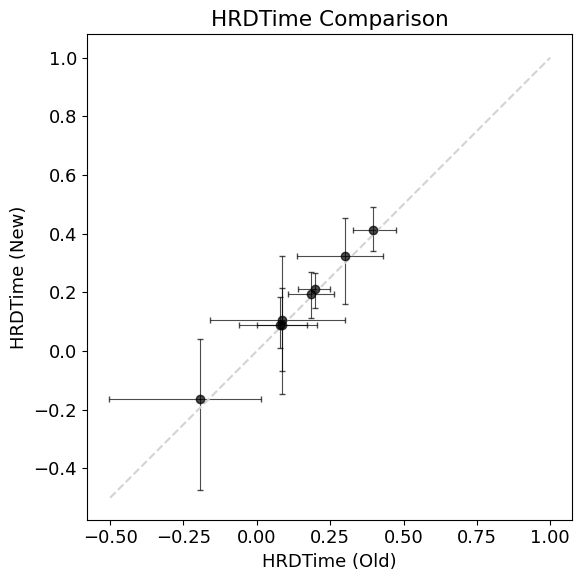

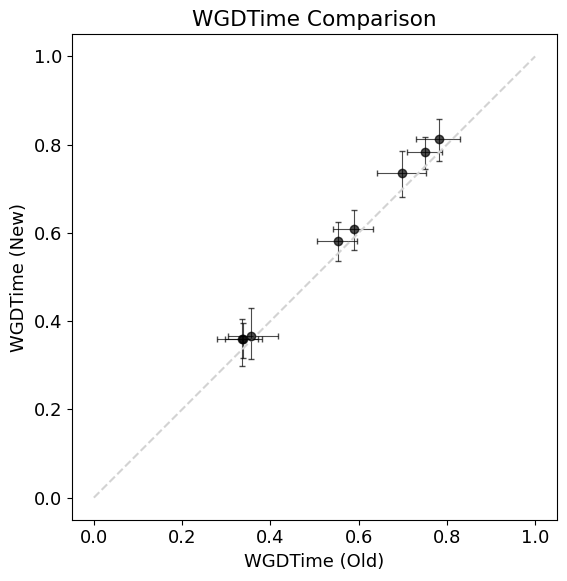

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
Inform_new = pd.read_csv("/Users/michail/HMS Dropbox/Michail Andreopoulos/HRDTimer/data/output/May27_TimingRun/INFORM_Breast_WGD_HRD_TimingResults_timing_nboot200_0001_only_prob_change_boot_pSub.csv")
Inform_old = pd.read_csv("/Users/michail/HMS Dropbox/Michail Andreopoulos/HRDTimer/data/output/May27_TimingRun/INFORM_Breast_WGD_HRD_TimingResults_timing_nboot200_0001_only_prob_change_boot.csv")

# Merge based on a unique identifier column, assuming 'ID'
df = Inform_old.merge(
    Inform_new,
    on="ID",
    suffixes=("_old", "_new")
)

# Function to plot comparison
def plot_with_errorbars(x_col, y_col, xerr_low, xerr_high, yerr_low, yerr_high, label, lim):
    x = df[f"{x_col}_old"]
    y = df[f"{y_col}_new"]

    xerr = [df[f"{xerr_low}_old"], df[f"{xerr_high}_old"]]
    yerr = [df[f"{yerr_low}_new"], df[f"{yerr_high}_new"]]

    plt.figure(figsize=(6, 6))
    plt.errorbar(
        x, y,
        xerr=xerr,
        yerr=yerr,
        fmt='o',
        color='black',
        ecolor='black',
        elinewidth=0.8,
        capsize=2,
        alpha=0.7,
    )
    plt.plot(lim, lim, linestyle='--', color='lightgrey')
    plt.xlabel(f"{label} (Old)")
    plt.ylabel(f"{label} (New)")
    plt.title(f"{label} Comparison")
    plt.grid(False)
    plt.axis('square')
    plt.tight_layout()
    plt.show()

# HRDTime plot
plot_with_errorbars("HRDTime", "HRDTime", "HRDTime_ci_lo", "HRDTime_ci_hi", "HRDTime_ci_lo", "HRDTime_ci_hi", "HRDTime", lim=[-0.5, 1])

# WGDTime plot
plot_with_errorbars("WGDTime", "WGDTime", "WGDTime_ci_lo", "WGDTime_ci_hi", "WGDTime_ci_lo", "WGDTime_ci_hi", "WGDTime", lim=[0, 1])
